In [8]:
import numpy as np

Wf = 100
y = np.linspace(0,-Wf,2500)
z = -y

dip = np.deg2rad(30)
H = 60 * np.sin(dip)
h = 20 * np.sin(dip)
Hs = [Wf,H,h]

avs = 0.025
avw_shallow = 0.012
avw_asperity = 0.011
b = 0.015

a = avs*np.ones(z.shape)
a[z < H] = avw_asperity*np.ones(z[z < H].shape)
a[z < h] = avw_shallow*np.ones(z[z < h].shape)
b = b*np.ones(a.shape)
a_b = a - b

sigma_vs = 20
sigma_asperity = 50
sigma_shallow = 5
cs0 = 3.464
rho0 = 2.670
mu0 = cs0**2*rho0
Vinit = 1.0e-9
f0 = 0.6
V0 = 1.0e-6
Dc = 5e-3
Dc_asperity = 1e-2
Vp = 1e-9
others = [Vp,rho0,V0,f0]

sigma0 = sigma_vs*np.ones(z.shape)
sigma0[z < H] = sigma_asperity*np.ones(z[z < H].shape)
sigma0[z < h] = sigma_shallow*np.ones(z[z < h].shape)

L = Dc*np.ones(z.shape)
L[z < H] = Dc_asperity*np.ones(z[z < H].shape)
L[z < h] = Dc*np.ones(z[z < h].shape)

eta = cs0*rho0 / 2.0
mu = mu0*np.ones(z.shape)
Vi = Vinit*np.ones(z.shape)
# print(eta)
# print(eta*Vinit)
# tau0 = f0*sigma0
e = np.exp((f0 + b * np.log(V0 / abs(Vi))) / avs)
# print(e)
# tau0 = -(sigma0 * avs * np.arcsinh((Vi / (2.0 * V0)) * e) + eta * Vi)
tau0 = -(sigma0 * avs * np.arcsinh((Vi / (2.0 * V0)) * e) * 0.95 + eta * Vi)
tau1 = -(sigma0*f0 + np.log(Vp / np.cos(dip) / V0))
# print(eta*Vi[0])
# print(np.arcsinh((Vi / (2.0 * V0)) * e))
# print(avs * np.arcsinh((Vi / (2.0 * V0)) * e))
# tau0 = -(sigma0 * f0 + np.log(Vp/np.cos(dip)/V0))
# tau0[z < h] = -sigma0[z < h] * f0
# print(max(abs(tau0)),min(abs(tau0)))
print(max(abs(tau0))-max(abs(tau1)))
print(min(abs(tau0))-min(abs(tau1)))

1.9827304898641636
-1.2420326138834592


In [15]:
b/avs

array([0.6, 0.6, 0.6, ..., 0.6, 0.6, 0.6])

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import integrate,interpolate
from cumslip_compute import *
import myplots
import change_params
import setup_shortcut

sc = setup_shortcut.setups()
ch = change_params.variate()
mp = myplots.Figpref()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
y,Hs,a,b,_a_b,tau0,sigma0,Dc,others = ch.load_parameter(prefix)

# ----------
save_dir = 'models/' + prefix
print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

# ----------
if prefix == 'Thakur20_various_fractal_profiles/v6_ab2_Dc2' or prefix == 'Thakur20_various_fractal_profiles/v6_ab2_Dc1_long':
    Vths = 1e-1
    intv = 0.15
else:
    Vths = 1e-2
    intv = 0.
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5
cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,intv)

# ----------
print('Load saved data: %s/Goutputs.npy'%(save_dir))
Goutputs = np.load('%s/Goutputs.npy'%(save_dir),allow_pickle=True)
avdsd = Goutputs.item().get('avdsd')
avssd = Goutputs.item().get('avssd')

Fractal normal stress model ver.6
Fractal a-b model ver.2
Fractal Dc model ver.2
Using file fractal_snpre_06
Using file fractal_ab_02
Using file fractal_Dc_02
Load saved data: models/Thakur20_various_fractal_profiles/v6_ab2_Dc2/outputs
Load saved data: models/Thakur20_various_fractal_profiles/v6_ab2_Dc2/outputs_depthinfo
Load saved data: models/Thakur20_various_fractal_profiles/v6_ab2_Dc2/const_params.npy
Cumulative slip vs. Depth plot >>> No cutting
Slip rate > 1e-01
All safe from the SR variation criterion
Load saved data: models/Thakur20_various_fractal_profiles/v6_ab2_Dc2/Goutputs.npy


Approximated 2D: Moment assuming a square fault patch
Output in moment magnitude (Mw) instead of moment (M0)


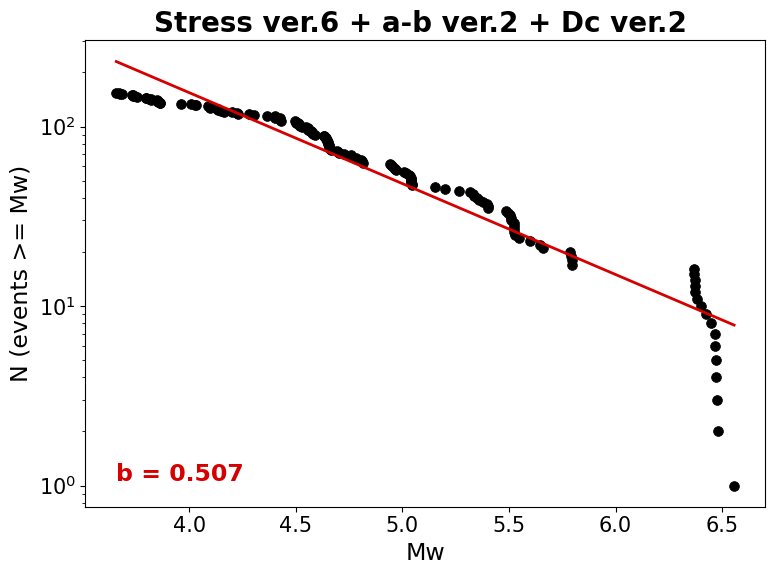

In [3]:
from misc_plots import compute_GR
# baseval,N,b,x,yN,a = compute_GR(save_dir,cumslip_outputs,0,rths,6.0,int(50))
baseval,N,b,x,yN,a = compute_GR(save_dir,cumslip_outputs,0,rths,0,int(50))
xlab = 'Mw'
ylab = 'N (events >= Mw)'
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(8,6))
ver_info = ch.version_info(prefix)
plt.plot(x,yN,color=mp.myburgundy,lw=2)
plt.scatter(baseval,N,s=50,color='k',edgecolors='k',lw=0.5)
plt.text(min(baseval),min(N),'b = %2.3f'%(-b),ha='left',va='bottom',fontsize=17,fontweight='bold',color=mp.myburgundy)
plt.title(ver_info,fontsize=20,fontweight='bold')
plt.xlabel(xlab,fontsize=17)
plt.ylabel(ylab,fontsize=17)
# print(plt.gca().get_yticklabels())
plt.yscale('log')
plt.tight_layout()

In [2]:
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)
if 'DZ' in save_dir:
    mu = params.item().get('mu_damage')*1e9
else:
    mu = params.item().get('mu')*1e9

if len(_a_b) == 2:
    a_b = _a_b[0]
    y_in = _a_b[1]
else:
    a_b = _a_b
    y_in = y

asp = abs(y_in[a_b>0])
c = 0
vs_start,vs_end = [],[]
for k,z in enumerate(abs(y_in)):
    # if a_b[k]>0 and z>Hs[3] and z<Hs[1]+Hs[2]:
    if a_b[k]>0:
        if c == 0:
            # vs_start.append(z)
            vs_end.append(z)
            c = 1
    else:
        if c == 1:
            # vs_end.append(abs(y_in)[k-1])
            vs_start.append(abs(y_in)[k-1])
            c = 0
vs_start.append(0)
print(vs_start,vs_end)

L = [vs_start[i]-vs_end[i+1] for i in range(len(vs_start)-1)]
# rupture_length = []
# av_slip = []
# fault_z = np.array(cumslip_outputs[3][1]).T[0]
# fault_slip = np.array(cumslip_outputs[1][2]).T
# event_cluster = cluster_events(cumslip_outputs)
# Sths = 1e-2

# for ti in range(fault_slip.shape[0]):
# # for ti in [62]:
#     fs = fault_slip[ti]
#     ii = np.where(fs>Sths)[0]
#     if min(ii) > 0:
#         ii = np.hstack(([min(ii)-1],ii))
#     if max(ii) < len(fs)-1:
#         ii = np.hstack((ii,[max(ii)+1]))
#     rupture_zone = fault_z[ii]
#     go,vwl = 0,0
#     for k,rz in enumerate(rupture_zone):
#         ivs = np.where(rz>=vs_start)[0][0]
#         if rz > vs_end[ivs]:
#             if go == 1:
#                 vwl += rupture_zone[k]-rupture_zone[k-1]
#             else:
#                 go = 1
#         else:
#             if go == 1:
#                 vwl += vs_start[ivs]-rupture_zone[k-1]
#             go = 0
#     L.append(vwl)
#     rl = max(fault_z[ii])-min(fault_z[ii])
#     f = interpolate.interp1d(fault_z,fs)
#     npts = 1000
#     newz = np.linspace(min(fault_z),max(fault_z),npts)
#     Dbar = integrate.simpson(f(newz),newz)/rl
#     rupture_length.append(rl)
#     av_slip.append(Dbar)         

print(L)

[13.614807403701851, 11.741870935467734, 10.301150575287643, 9.004502251125563, 6.9394697348674335, 4.754377188594297, 0] [24.0, 12.594297148574286, 10.601300650325163, 9.100550275137568, 7.479739869934967, 5.078539269634818, 1.392696348174087]
[1.020510255127565, 1.1405702851425712, 1.2006003001500751, 1.5247623811905964, 1.8609304652326157, 3.3616808404202105]


13.8 9.75167583791896 6.400375674960359


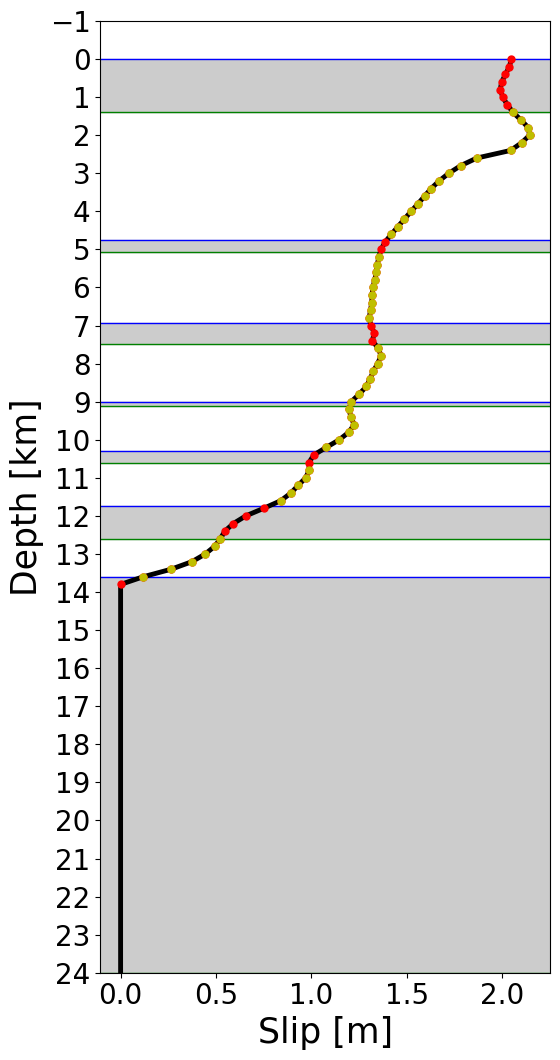

In [44]:
# ti = np.random.randint(0,fault_slip.shape[0])
ti = 6
fs = fault_slip[ti]
ii = np.where(fs>Sths)[0]
if min(ii) > 0:
    ii = np.hstack(([min(ii)-1],ii))
if max(ii) < len(fs)-1:
    ii = np.hstack((ii,[max(ii)+1]))
rupture_zone = fault_z[ii]
go,vwl = 0,0
target_fs,target_z = [],[]
for k,rz in enumerate(rupture_zone):
    ivs = np.where(rz>=vs_start)[0][0]
    if rz > vs_end[ivs]:
        if go == 1:
            vwl += rupture_zone[k]-rupture_zone[k-1]
        else:
            go = 1
        target_z.append(rupture_zone[k])
        target_fs.append(fs[ii][k])
    else:
        if go == 1:
            vwl += vs_start[ivs]-rupture_zone[k-1]
        go = 0
rl = max(fault_z[ii])-min(fault_z[ii])
f = interpolate.interp1d(fault_z,fs)
npts = 1000
newz = np.linspace(min(fault_z),max(fault_z),npts)
Dbar = integrate.simpson(f(newz),newz)/rl
M0 = mu * ((rl*1e3)**2) * Dbar
print(rl,vwl,2/3*(np.log10(M0)-9.1))
plt.rcParams['font.size'] = '20'
fig,ax = plt.subplots(figsize=(6,11))
# ax.plot(b,abs(y_in),color='k',lw=8.5,label='b',zorder=3)
# ax.plot(a_b,abs(y_in),color=mp.myburgundy,lw=2.5,zorder=3)
ax.plot(fs,fault_z,color='k',lw=3.5,zorder=3)
ax.scatter(fs[ii],fault_z[ii],25,color='r',zorder=3)
ax.scatter(target_fs,target_z,25,color='y',zorder=3)
# ax.axes.yaxis.set_ticklabels([])
xl = ax.get_xlim()
# ax.hlines(y=Hs[3],xmin=xl[0],xmax=xl[1],lw=1.5,linestyles='--',color='0.62')
# ax.hlines(y=Hs[1],xmin=xl[0],xmax=xl[1],lw=1.5,linestyles='--',color='0.62')
# ax.hlines(y=(Hs[1]+Hs[2]),xmin=xl[0],xmax=xl[1],lw=1.5,linestyles='--',color='0.62')
ax.hlines(y=asp,xmin=xl[0],xmax=xl[1],color='0.8',lw=1,zorder=0)
ax.hlines(y=vs_start,xmin=xl[0],xmax=xl[1],color='b',lw=1,zorder=0)
ax.hlines(y=vs_end,xmin=xl[0],xmax=xl[1],color='g',lw=1,zorder=0)
# ax.vlines(x=0,ymin=0,ymax=Hs[0],lw=1.5,linestyles='--',color='0.62')
ax.set_xlabel('Slip [m]',fontsize=25)
ax.set_ylabel('Depth [km]',fontsize=25)
ax.set_xlim(xl[0],xl[1])
ax.set_yticks(np.arange(-1,Hs[0]+1,1))
ax.set_ylim(-1,Hs[0])
ax.invert_yaxis()
plt.tight_layout()
# plt.savefig('%s/minVWL.png'%(save_dir))
# plt.savefig('%s/maxVWL.png'%(save_dir))
plt.show()

In [8]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b = SS_xy / SS_xx
    a = m_y - b*m_x
 
    return (a, b)

Mtype = 2
L = np.array(L)
# print(min(L),max(L),np.argmin(L),np.argmax(L))
match Mtype:
    case 0:
        print('case 0')
        Mw = np.log10(((L*1e3)**3))
        fname = ''
        xlab = r'log$(L^3)$'
        ylab = 'N (length >= L)'
    case 1:
        print('case 1')
        M0 = ((L*1e3)**3)*mu
        Mw = 2/3*(np.log10(M0)-9.1)
        fname = '_to_Mw'
        xlab = r'Mw ($L^3$)'
        ylab = 'N (events >= Mw)'
    case 2:
        print('case 2')
        stress_drop = np.mean(avssd)
        # stress_drop = np.mean(avdsd)
        r = (L*1e3)/2
        M0 = (r**3)*stress_drop*16/7
        Mw = np.log10(M0)
        # Mw = 2/3*(np.log10(M0)-9.1)
        fname = '_to_Mw_with_SD'
        xlab = r'Mw ($r^3\Delta\sigma$)'
        ylab = 'N (events >= Mw)'

print(min(Mw),max(Mw))
baseval = Mw
# baseval = np.linspace(min(Mw),max(Mw),50)[:-1]
N = np.array([sum(Mw >= mag) for mag in baseval])
x = baseval; y = np.log10(N)
# ii = np.where(baseval<=5000)[0][-1]+1; x = baseval[0:ii]; y = np.log10(N[0:ii])
# ii = np.where(np.logical_and(baseval<=8.3,baseval>=6.5))[0]; x = baseval[ii]; y = np.log10(N[ii])
a,b = estimate_coef(x,y)
yN = np.power(10,a + b*x)

case 2
15.049528877316177 16.602746194199955


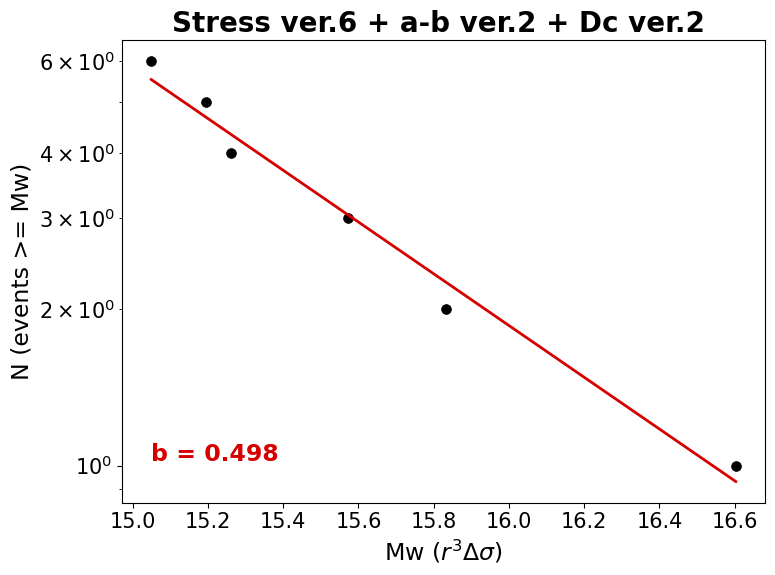

In [9]:
save_on = 0
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(8,6))
ver_info = ch.version_info(prefix)
plt.plot(x,yN,color=mp.myburgundy,lw=2)
plt.scatter(baseval,N,s=50,color='k',edgecolors='k',lw=0.5)
plt.text(min(baseval),min(N),'b = %2.3f'%(-b),ha='left',va='bottom',fontsize=17,fontweight='bold',color=mp.myburgundy)
plt.title(ver_info,fontsize=20,fontweight='bold')
plt.xlabel(xlab,fontsize=17)
plt.ylabel(ylab,fontsize=17)
# print(plt.gca().get_yticklabels())
plt.yscale('log')
plt.tight_layout()
if save_on:
    plt.savefig('%s/GRrelation_VWL%s.png'%(save_dir,fname),dpi=300)

In [5]:
x

array([6.40037567, 4.51470613, 3.85373779, 4.76500385, 5.64551353,
       6.55628155, 4.58063214, 4.54760855, 5.00705548, 5.39799104,
       4.97109078, 5.54676189, 4.9614049 , 6.36769078, 4.65473086,
       3.80938208, 3.85305742, 4.65040582, 4.14796736, 4.09859834,
       3.65779331, 5.03996267, 4.72453354, 3.75355228, 5.3321966 ,
       5.7947658 , 6.47071597, 4.55822009, 4.40423996, 5.50336304,
       5.01620765, 5.52438956, 4.56643912, 6.37515492, 4.65324103,
       3.79807382, 3.84776698, 4.64181756, 4.14103011, 4.03191151,
       5.0382632 , 4.65950065, 3.73501439, 5.33429994, 5.78780562,
       6.46866837, 4.55793611, 4.40201867, 5.50762399, 5.0382015 ,
       5.52377772, 4.57665621, 6.36933528, 4.65377657, 3.79635999,
       3.84678649, 4.64224535, 4.13394112, 4.02739144, 5.03833601,
       4.65049449, 3.72951277, 4.59193829, 5.35906702, 5.7912152 ,
       4.27854251, 6.4497045 , 4.63159847, 3.68609505, 4.43201064,
       4.51695172, 5.15114939, 5.2671673 , 5.48752464, 4.94237

In [ ]:
def plot_ab(ax,prefix):
    y,Hs,a0,b0,_a_b = ch.load_parameter(prefix)[0:5]
    if len(_a_b) == 2:
        y_in = _a_b[1]
    else:
        y_in = y
    asp = -_a_b[1][np.logical_and(_a_b[0]>0,np.logical_and(abs(_a_b[1])>Hs[3],abs(_a_b[1])<Hs[1]))]
    ax.plot(b0,abs(y_in),color='k',lw=8.5,label='b',zorder=3)
    ax.plot(a0-b0,abs(y_in),color=mp.myburgundy,lw=8.5,label='a-b',zorder=3)
    ax.axes.yaxis.set_ticklabels([])
    xl = ax.get_xlim()
    ax.hlines(y=Hs[3],xmin=xl[0],xmax=0.025,lw=1.5,linestyles='--',color='0.62')
    ax.hlines(y=Hs[1],xmin=xl[0],xmax=0.025,lw=1.5,linestyles='--',color='0.62')
    ax.hlines(y=(Hs[1]+Hs[2]),xmin=xl[0],xmax=0.025,lw=1.5,linestyles='--',color='0.62')
    ax.hlines(y=asp,xmin=xl[0],xmax=0.025,color='0.62',lw=1,zorder=0)
    ax.vlines(x=0,ymin=0,ymax=Hs[0],lw=1.5,linestyles='--',color='0.62')
    ax.set_xlabel('Friction Paramters',fontsize=30)
    ax.set_xlim(xl[0],0.025)
    ax.set_ylim(0,Hs[0])
    ax.invert_yaxis()
    ax.legend(fontsize=20,loc='lower left')

def plot_dc(ax,prefix):
    y,Hs,a,b,a_b,tau0,sigma0,_Dc,others = ch.load_parameter(prefix)
    if len(_Dc) == 2:
        Dc0 = _Dc[0]
        y_in = _Dc[1]
    else:
        Dc0 = _Dc
        y_in = y

    ax.plot(Dc0,abs(y_in),color=mp.myburgundy,lw=8.5,zorder=3)
    ax.axes.yaxis.set_ticklabels([])
    xl = ax.get_xlim()
    ax.hlines(y=Hs[1],xmin=0,xmax=xl[1],lw=2.5,linestyles='--',color='0.62')
    ax.hlines(y=Hs[3],xmin=0,xmax=xl[1],lw=2.5,linestyles='--',color='0.62')
    ax.hlines(y=Hs[1]+Hs[2],xmin=0,xmax=xl[1],lw=2.5,linestyles='--',color='0.62') 
    ax.set_xlabel('Dc [m]',fontsize=30)
    ax.set_xlim(0,xl[1])
    ax.set_ylim(0,Hs[0])
    ax.invert_yaxis()

def plot_st(ax,prefix):
    y,Hs,a,b,_a_b,tau0,_sigma0,L,others = ch.load_parameter(prefix)
    if len(_sigma0) == 2:
        sigma0 = _sigma0[0]
        y_in = _sigma0[1]
        tau0 = ch.same_length(y,tau0,y_in)
    else:
        sigma0 = _sigma0
        y_in = y
    ax.plot(-tau0,abs(y_in),lw=8.5,color='k',label='Shear stress',zorder=3)
    ax.plot(sigma0,abs(y_in),lw=8.5,color=mp.myburgundy,label='Normal stress',zorder=3)
    ax.axes.yaxis.set_ticklabels([])
    xl = ax.get_xlim()
    ax.hlines(y=Hs[1],xmax=max(xl)*1.2,xmin=0,color='0.62',lw=1.5,linestyles='--')
    ax.hlines(y=(Hs[1]+Hs[2]),xmax=max(xl)*1.2,xmin=0,color='0.62',lw=1.5,linestyles='--')
    if len(Hs) > 3:
        ax.hlines(y=Hs[3],xmax=max(xl)*1.2,xmin=0,color='0.62',lw=1.5,linestyles='--')
    ax.set_xlabel('Initial Stress [MPa]',fontsize=30)
    ax.set_xlim([0,xl[1]])
    ax.set_ylim(0,Hs[0])
    ax.invert_yaxis()
    ax.legend(fontsize=21,loc='lower left')

In [ ]:
plt.rcParams['font.size'] = '27'
fig,ax = plt.subplots(ncols=3,figsize=(17,10.5))
# plt.subplots_adjust(wspace=-)
plot_ab(ax[0],prefix)
plot_dc(ax[1],prefix)
plot_st(ax[2],prefix)

plt.tight_layout()
plt.savefig('models/%s/abdcst_profile.png'%(prefix),dpi=300)

In [ ]:
plt.rcParams['font.size'] = '27'
fig,ax = plt.subplots(figsize=(17,10.5))
# plt.subplots_adjust(wspace=-)
plot_ab(ax,prefix)
plt.gca().set_xticks([-0.01,0.005,0.025])
xt = plt.gca().get_xticks()
kk=[str(ticks*10) for ticks in xt]
print(kk)
plt.gca().set_xticklabels(kk)
plt.tight_layout()

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from cumslip_compute import *
from misc_plots import compute_M0
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc1_long'
# prefix = 'Thakur20_hetero_stress/n8_v6'

# ----------
save_dir = 'models/'+prefix

print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

# ----------
if prefix == 'Thakur20_various_fractal_profiles/v6_ab2_Dc2' or prefix == 'Thakur20_various_fractal_profiles/v6_ab2_Dc1_long':
    Vths = 1e-1
    intv = 0.15
else:
    Vths = 1e-2
    intv = 0.
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5
cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,intv)

# ----------
# time = np.array([outputs[i][:,0] for i in np.argsort(abs(dep))])
# state_var = abs(np.array([outputs[i][:,1] for i in np.argsort(abs(dep))]))
# shearT = abs(np.array([outputs[i][:,3] for i in np.argsort(abs(dep))]))
# sr = abs(np.array([outputs[i][:,4] for i in np.argsort(abs(dep))]))
# z = np.sort(abs(dep))

In [ ]:
from scipy import integrate,interpolate
fault_z = np.array(cumslip_outputs[3][1]).T[0]
fault_slip = np.array(cumslip_outputs[1][2]).T
event_cluster = cluster_events(cumslip_outputs)

# ti = np.random.randint(0,fault_slip.shape[0])
ti = 94
fs = fault_slip[ti]
Sths = 1e-2
# ii = np.where(fs>Sths)[0]
# if min(ii) > 0:
#     ii = np.hstack(([min(ii)-1],ii))
# if max(ii) < len(fs)-1:
#     ii = np.hstack((ii,[max(ii)+1]))
# rl = max(fault_z[ii])-min(fault_z[ii])
# f = interpolate.interp1d(fault_z,fs)
# npts = 1000
# newz = np.linspace(min(fault_z),max(fault_z),npts)
# Dbar = integrate.simpson(f(newz),newz)/rl
# print('ti =',ti,'rl =',rl,'Dbar =',Dbar,'meanD =',np.mean(fs[ii]))

plt.rcParams['font.size'] = '15'
plt.figure(figsize=(5,5))
plt.plot(fs,fault_z,color='0.8',lw=2)
# plt.plot(fs[ii],fault_z[ii],color=mp.myburgundy,lw=2)
# plt.scatter(fs[ii],fault_z[ii],s=5,color=mp.myburgundy,lw=2,zorder=3)
plt.xlabel('Slip [m]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
min(fault_z[ii]),max(fault_z[ii])

In [ ]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(3,5))
plt.plot(fs,fault_z,color='0.8',lw=2)
plt.plot(fs[ii],fault_z[ii],color=mp.myburgundy,lw=2)
# plt.scatter(fs[ii],fault_z[ii],s=50,color=mp.myburgundy,lw=2)
plt.xlabel('Slip [m]',fontsize=17)
plt.ylabel('Depth [km]',fontsize=17)
# plt.grid(True)
plt.gca().invert_yaxis()
plt.tight_layout()
# if save_on:
#     plt.savefig('%s/GRrelation.png'%(save_dir),dpi=300)
plt.show()

In [ ]:
spatial_mean = np.mean(shearT,axis=0)
tyrs = time[0]/sc.yr2sec
ii = np.where(tyrs>=200)[0][0]
tau_av = np.max(spatial_mean[ii:])
itau_av = np.argmax(spatial_mean[ii:])

plt.rcParams['font.size'] = '15'
plt.figure(figsize=(10,6))
plt.plot(tyrs[0:ii],spatial_mean[0:ii],color='0.8',lw=2)
plt.plot(tyrs[ii:],spatial_mean[ii:],color='k',lw=2)
plt.hlines(y=tau_av,xmin=tyrs[ii],xmax=tyrs[-1],linestyles='--',lw=2,color=mp.myburgundy)
plt.text(tyrs[itau_av],tau_av,r'$\mathbf{\tau_{av}}$ = %2.2f'%(tau_av),ha='left',va='bottom',fontsize=17,fontweight='bold',color=mp.myburgundy)
# plt.title(ver_info,fontsize=20,fontweight='bold')
plt.xlabel('Time [yrs]',fontsize=17)
plt.ylabel('Spatial Average of Shear Stress [MPa]',fontsize=17)
# plt.grid(True)
plt.tight_layout()
# if save_on:
#     plt.savefig('%s/GRrelation.png'%(save_dir),dpi=300)
plt.show()

In [ ]:
y,Hs,a0,b0,_a_b = ch.load_parameter(prefix)[0:5]
if len(_a_b) == 2:
    mesh_y = -_a_b[1]
else:
    mesh_y = -y
VW = np.where(np.logical_and(mesh_y >= Hs[-1], mesh_y<= Hs[1]))[0]
# print(max(mesh_y[VW]),min(mesh_y[VW]))
print(np.mean(_a_b[0][VW]))

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(figsize=(9,7))
ax.vlines(x=0,ymin=0,ymax=Hs[0],color=mp.myblue,lw=8.5,linestyles='--')
ax.vlines(x=np.mean(_a_b[0][VW]),ymin=0,ymax=Hs[0],color=mp.mypink,lw=8.5,linestyles='--')
ax.plot(a0-b0,abs(mesh_y),color='k',lw=8.5,zorder=3)
ax.set_xlabel('a - b',fontsize=17)
ax.set_ylabel('Depth [km]',fontsize=17)
xl = ax.get_xlim()
ax.set_xlim(xl[0],0.025)
ax.set_ylim(0,Hs[0])
ax.hlines(y=Hs[3],xmin=xl[0],xmax=0.025,lw=1.5,linestyles='--',color='0.62')
ax.hlines(y=Hs[1],xmin=xl[0],xmax=0.025,lw=1.5,linestyles='--',color='0.62')
ax.hlines(y=(Hs[1]+Hs[2]),xmin=xl[0],xmax=0.025,lw=1.5,linestyles='--',color='0.62')
ax.invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.savefig('%s/ab_mean'%(save_dir),dpi=300)

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from cumslip_compute import *
from misc_plots import compute_M0
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
# prefix = 'Thakur20_hetero_stress/n8_v6'

# ----------
save_dir = 'models/'+prefix

print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

# ----------
if prefix == 'Thakur20_various_fractal_profiles/v6_ab2_Dc2':
    Vths = 1e-1
    intv = 0.15
else:
    Vths = 1e-2
    intv = 0.
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5
cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,intv)

# ----------
npts = 50
Mw = compute_M0(save_dir,cumslip_outputs,mode='approx2d',Mw=True)
baseval = np.linspace(min(Mw),max(Mw),npts)[1:-1]
N = np.array([sum(Mw >= mag) for mag in baseval])

In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b = SS_xy / SS_xx
    a = m_y - b*m_x
 
    return (a, b)

In [ ]:
ver_info = ch.version_info(prefix)
ii = np.where(baseval>=5.25)[0][0]; x = baseval[ii:]; y = np.log10(N[ii:])
a,b = estimate_coef(x,y)
yN = np.power(10,a + b*x)

plt.rcParams['font.size'] = '15'
plt.figure(figsize=(8,6))
plt.plot(x,yN,color=mp.myburgundy,lw=2)
plt.scatter(baseval,N,s=50,color='k',edgecolors='k',lw=0.5)
plt.text(min(baseval),min(N),'b = %2.3f'%(-b),ha='left',va='bottom',fontsize=17,fontweight='bold',color=mp.myburgundy)
plt.title(ver_info,fontsize=20,fontweight='bold')
plt.xlabel('Moment Magnitude (Mw)',fontsize=17)
plt.ylabel('N (events > Mw)',fontsize=17)
it = 1
maxN = max(N)
while maxN > 10:
    maxN /= 10
    it *= 10
# plt.ylim(0,np.ceil(maxN*10)*it/10)
plt.yscale('log')
# plt.grid(True)
plt.tight_layout()
# if save_on:
#     plt.savefig('%s/GRrelation.png'%(save_dir),dpi=300)
plt.show()

In [ ]:
min(y),min(np.log10(N))

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from cumslip_compute import *
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
# prefix = 'Thakur20_hetero_stress/n8_v6'

# ----------
save_dir = 'models/'+prefix

print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

# ----------
if prefix == 'Thakur20_various_fractal_profiles/v6_ab2_Dc2':
    Vths = 1e-1
    intv = 0.15
else:
    Vths = 1e-2
    intv = 0.
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5

cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,intv)
tstart,tend = cumslip_outputs[0]
event_cluster,lead_fs,major_pr,minor_pr = analyze_events(cumslip_outputs,rths)[4:]

In [ ]:
spin_up_idx = compute_spinup(outputs,dep,cuttime,cumslip_outputs,['yrs',200])[-1]
print(spin_up_idx)

In [ ]:
from misc_plots import compute_M0
Mw = compute_M0(save_dir,cumslip_outputs,mode='approx2d',Mw=True)

In [ ]:
event_cluster = event_cluster[5:]

In [ ]:
compile_mag = []
for k,ec in enumerate(event_cluster):
    if ec[1] == ec[0]:
        compile_mag.append([Mw[ec[0]]])
    else:
        compile_mag.append([Mw[u] for u in range(ec[0],ec[1]+1)])
print(compile_mag)

In [ ]:
maxlen = 0; maxindx = 0;
for k,ec in enumerate(event_cluster):
    if len(compile_mag[k]) > maxlen:
        maxlen = len(compile_mag[k])
        maxindx = k
    # if len(compile_mag[k]) != ec[1]-ec[0]+1:
    #     print('wrong')
print(maxlen,maxindx)

In [ ]:
cmap1 = mpl.colormaps['Blues']
cmap2 = mpl.colormaps['pink_r']
cmap3 = mpl.colormaps['YlGn']
# colset1 = cmap1(np.linspace(0.15,0.9,maxlen))
colset1 = cmap1(np.linspace(0.25,1,maxlen))
colset2 = cmap2(np.linspace(0.2,0.9,maxlen))
colset3 = cmap3(np.linspace(0.45,1.0,maxlen))

x = np.arange(len(event_cluster))
width = 0.09
multiplier = 0
ik = 0
txt = [[],[],[]]
plt.rcParams['font.size'] = '15'
fig,axp = plt.subplots(figsize=(15,6))
for k in range(len(tstart)):
    offset = width * multiplier
    if event_cluster[ik][0] in lead_fs:
        if x[ik] >= 5: axp.bar(x[ik]+offset,Mw[event_cluster[ik][0]+multiplier],width,color=colset1[multiplier])
        # txt[0] = 'Leading foreshocks'
    elif event_cluster[ik][0] in event_cluster[major_pr][:,0]:
        if x[ik] >= 5: axp.bar(x[ik]+offset,Mw[event_cluster[ik][0]+multiplier],width,color=colset2[multiplier])
        # txt[1] = 'Sequence of partial ruptures'
    elif event_cluster[ik][0] in event_cluster[minor_pr][:,0]:
        if x[ik] >= 5: axp.bar(x[ik]+offset,Mw[event_cluster[ik][0]+multiplier],width,color=colset3[multiplier])
        # txt[2] = 'Minor partial ruptures'
    multiplier += 1
    if multiplier == event_cluster[ik][-1]-event_cluster[ik][0]+1:
        multiplier = 0
        ik += 1
# for ix in range(3):
#     xl = ax[ix].get_xlim()
#     ax[ix].text(xl[1]-(xl[1]-xl[0])*0.025,0.35,txt[ix],fontsize=15,fontweight='bold',bbox=mp.tboxprop,ha='right',va='bottom')
axp.set_xticks(x[x>=5])
axp.set_xlabel('Event Cluster Index',fontsize=17)
axp.set_ylabel('Mw',fontsize=17)
plt.tight_layout()
plt.savefig('%s/Mw_within_clusters.png'%(save_dir))

In [ ]:
cmap1 = mpl.colormaps['Blues_r']
cmap1 = mpl.colormaps['Pink_r']
cmap1 = mpl.colormaps['YlGn_r']
colset1 = cmap1(np.linspace(0.15,0.9,maxlen))
colset2 = cmap2(np.linspace(0.15,0.9,maxlen))
colset3 = cmap3(np.linspace(0.15,0.9,maxlen))

x = np.arange(len(event_cluster))
width = 0.1
multiplier = 0
ik = 0
txt = [[],[],[]]
plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(nrows=3,figsize=(10,12))
for k in range(len(tstart)):
    offset = width * multiplier
    if event_cluster[ik][0] in lead_fs:
        axp = ax[0]
        txt[0] = 'System-wide event cascades'
    elif event_cluster[ik][0] in event_cluster[major_pr][:,0]:
        axp = ax[1]
        txt[1] = 'Sequence of partial ruptures'
    elif event_cluster[ik][0] in event_cluster[minor_pr][:,0]:
        axp = ax[2]        
        txt[2] = 'Minor partial ruptures'
    axp.bar(x[ik]+offset,Mw[event_cluster[ik][0]+multiplier],width,color=colset[multiplier])
    multiplier += 1
    if multiplier == event_cluster[ik][-1]-event_cluster[ik][0]+1:
        multiplier = 0
        ik += 1
for ix in range(3):
    xl = ax[ix].get_xlim()
    ax[ix].text(xl[1]-(xl[1]-xl[0])*0.025,0.35,txt[ix],fontsize=15,fontweight='bold',bbox=mp.tboxprop,ha='right',va='bottom')
ax[0].set_xticks(x[np.where([u[0] in lead_fs for u in event_cluster])[0]])
ax[1].set_xticks(major_pr)
ax[2].set_xticks(minor_pr)
yl = ax[0].get_ylim()
ax[1].set_ylim(yl)
ax[2].set_ylim(yl)
ax[2].set_xlabel('Event Cluster Index',fontsize=17)
ax[0].set_ylabel('Mw',fontsize=17)
ax[1].set_ylabel('Mw',fontsize=17)
ax[2].set_ylabel('Mw',fontsize=17)
plt.tight_layout()
plt.savefig('%s/Mw_within_clusters.png'%(save_dir))

In [ ]:
ax[0].get_ylim()

In [ ]:
import myplots
mp = myplots.Figpref()

save_on = 0
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(10,6))
cmap = mpl.colormaps['Blues']
cc = cmap(np.linspace(0.5,0.9,len(event_cluster)))
for u in range(len(cc)):
    plt.scatter(np.arange(event_cluster[u][0],event_cluster[u][1]),event_gap[event_cluster[u][0]:event_cluster[u][1]],s=36,color=cc[u],edgecolors='k',lw=0.5)
# plt.scatter(np.arange(len(tstart)-1),event_gap,s=36,color=mp.myburgundy,edgecolors='k',lw=0.5)
# plt.scatter(system_wide[system_wide>=spin_up_idx],M0_1D[system_wide[system_wide>=spin_up_idx]],s=121,color=mp.mydarkviolet,edgecolors='k',lw=0.5,marker='*',label='System-wide events')
# plt.scatter(partial_rupture[partial_rupture>=spin_up_idx],M0_1D[partial_rupture[partial_rupture>=spin_up_idx]],s=36,color=mp.mylightblue,edgecolors='k',lw=0.5,marker='d',label='Partial-rupture events')
# plt.legend(loc='lower right',fontsize=13)
plt.xlabel('Event Interval Index',fontsize=17)
plt.ylabel('Gap Between Events [yrs]',fontsize=17)
plt.yscale('log')
# yl = plt.gca().get_ylim()
# plt.ylim(yl[0]*0.2,yl[1])
plt.grid(True,alpha=0.5)
plt.tight_layout()
# if save_on:
#     plt.savefig('%s/1D_Moments.png'%(save_dir),dpi=300)
plt.show()

In [ ]:
print(event_cluster[u])
print(np.arange(event_cluster[u][0],event_cluster[u][1]+1))
print(len(event_gap[event_cluster[u][0]:event_cluster[u][1]+1]))

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from scipy import interpolate
from cumslip_compute import *
from misc_plots import *
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
# prefix = 'Thakur20_hetero_stress/n8_v6'

# ----------
save_dir = 'models/'+prefix

print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

# ----------
if prefix == 'Thakur20_various_fractal_profiles/v6_ab2_Dc2':
    Vths = 1e-1
    intv = 0.15
else:
    Vths = 1e-2
    intv = 0.
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5

# mode = '1d'
mode = 'approx2d'
cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,intv)
M0_1D = compute_M0(save_dir,cumslip_outputs,mode)
system_wide,partial_rupture = analyze_events(cumslip_outputs,rths)[2:]

In [ ]:
plot_M0(save_dir,cumslip_outputs,0,rths,mode,save_on=False)

In [ ]:
type(M0_1D)

In [ ]:
import myplots
mp = myplots.Figpref()

save_on = 0
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(10,6))
cmap = mpl.colormaps['gnuplot']
# maxM0 = np.max(M0_1D)
# order = 0
# while maxM0 >= 10:
#     maxM0 /= 10
#     order += 1
# scale = 10**(order)
# plt.scatter(partial_rupture,M0_1D[partial_rupture]/scale,s=36,color='0.62')
# plt.scatter(system_wide,M0_1D[system_wide]/scale,s=36,color=[cmap(i) for i in np.linspace(0.5,0.9,len(system_wide))])
# plt.scatter(system_wide,M0_1D[system_wide],s=36,color=[cmap(i) for i in np.linspace(0.5,0.9,len(system_wide))])
plt.scatter(system_wide[system_wide>=spin_up_idx],M0_1D[system_wide[system_wide>=spin_up_idx]],s=121,color=mp.mydarkviolet,edgecolors='k',lw=0.5,marker='*',label='System-wide events')
plt.scatter(partial_rupture[partial_rupture>=spin_up_idx],M0_1D[partial_rupture[partial_rupture>=spin_up_idx]],s=36,color=mp.mylightblue,edgecolors='k',lw=0.5,marker='d',label='Partial-rupture events')
plt.legend(loc='lower right',fontsize=13)
plt.xlabel('Event Index',fontsize=17)
# plt.ylabel('Force [$10^{%d}$N]'%(order),fontsize=17)
plt.ylabel('Moment per Length [N]',fontsize=17)
plt.yscale('log')
yl = plt.gca().get_ylim()
plt.ylim(yl[0]*0.2,yl[1])
plt.grid(True,alpha=0.5)
plt.tight_layout()
if save_on:
    plt.savefig('%s/1D_Moments.png'%(save_dir),dpi=300)
plt.show()

In [ ]:
system_wide>=spin_up_idx

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from scipy import interpolate
from cumslip_compute import *
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
# prefix = 'Thakur20_hetero_stress/n8_v6'

# ----------
save_dir = 'models/'+prefix

print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

# ----------
if prefix == 'Thakur20_various_fractal_profiles/v6_ab2_Dc2':
    Vths = 1e-1
    intv = 0.15
else:
    Vths = 1e-2
    intv = 0.
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5

cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,intv)
tstart,tend = cumslip_outputs[0]
cscoseis,depcoseis = cumslip_outputs[3]
fault_slip = cumslip_outputs[1][2]

In [ ]:
fault_z = np.array(cumslip_outputs[3][1]).T[0]
print(fault_z)

In [ ]:
fault_slip = np.array(cumslip_outputs[1][2]).T
fault_slip.shape

load variable

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from scipy import interpolate
from faultoutputs_image import *
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

# prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
prefix = 'Thakur20_hetero_stress/n8_v6'

# ----------
save_dir = 'models/'+prefix

print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

time = np.array([outputs[i][:,0] for i in np.argsort(abs(dep))])
sr = abs(np.array([outputs[i][:,4] for i in np.argsort(abs(dep))]))
shearT = abs(np.array([outputs[i][:,3] for i in np.argsort(abs(dep))]))
z = np.sort(abs(dep))

# ----------
image = 'sliprate'

if image == 'sliprate':
    vmin,vmax = 1e-12,1e1
elif image == 'shearT':
    vmin,vmax = -5,5
else:
    vmin,vamx = None,None

if prefix == 'Thakur20_various_fractal_profiles/v6_ab2_Dc2':
    Vths = 1e-1
else:
    Vths = 1e-2
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5

time = np.array([outputs[i][:,0] for i in np.argsort(abs(dep))])
sr = abs(np.array([outputs[i][:,4] for i in np.argsort(abs(dep))]))
shearT = abs(np.array([outputs[i][:,3] for i in np.argsort(abs(dep))]))
z = np.sort(abs(dep))

event_times

In [ ]:
time = np.array(outputs[0][:,0])
sliprate = abs(np.array([outputs[i][:,4] for i in np.argsort(abs(dep))]))
z = np.sort(abs(dep))

if abs(cuttime) >= 1e-3:
    if cuttime > np.max(time):
        raise ValueError('Cuttime larger than total simulation time - check again')
    sliprate = sliprate[:,time <= cuttime]
    time = time[time <= cuttime]

psr = np.max(sliprate,axis=0)
pd = np.argmax(sliprate,axis=0)

# Define events by peak sliprate
if Vlb > 0:
    events = np.where(np.logical_and(psr < Vths,psr > Vlb))[0]
else:
    events = np.where(psr > Vths)[0]

jumps = np.where(np.diff(events)>1)[0]+1

tmp_tstart = time[events][np.hstack(([0],jumps))]
tmp_tend = time[events][np.hstack((jumps-1,len(events)-1))]
tmp_evdep = pd[events][np.hstack(([0],jumps))]

ii = np.where(tmp_tend-tmp_tstart>=dt_coseismic)[0]
tstart = tmp_tstart[ii]
tend = tmp_tend[ii]
amax = tmp_evdep[ii]
evdep = z[tmp_evdep[ii]]

intv = 0.
# intv = 0.15
its_all = np.array([np.argmin(abs(time-t)) for t in tstart])
ite_all = np.array([np.argmin(abs(time-t)) for t in tend])
diffcrit = np.quantile(abs(np.diff(np.log10(psr[events]))),0.98)
new_its_all = its_all.copy()
for k,ts in enumerate(its_all):
    psr_inc = abs(np.diff(np.log10(psr)))[ts-1]
    width = int((ite_all[k] - ts)*intv)
    large_diffs = np.where(abs(np.diff(np.log10(psr)))[ts-1:ts-1+width]>=diffcrit)[0]
    if psr_inc < diffcrit and len(large_diffs) > 0:
        new_its_all[k] = large_diffs[0] + ts
    # else:
    #     new_its_all[k] = np.argmax(abs(np.diff(np.log10(psr)))[ts-1:ts-1+width]) + ts
evdep = z[pd[new_its_all]]
tstart = time[new_its_all]

varsr = np.array([np.log10(psr[its_all[k]:ite_all[k]+1]).max()-np.log10(psr[its_all[k]:ite_all[k]+1]).min() \
    for k in range(len(tstart))])
# print(prefix,varsr.min(),varsr.max(),np.argmin(varsr))
ii = np.where(varsr/abs(np.log10(Vths))>=0.1)[0]
if len(ii) < len(tstart):
    print('Eliminated events:',np.where(varsr/abs(np.log10(Vths))<0.1)[0])
    tstart = tstart[ii]
    tend = tend[ii]
    evdep = evdep[ii]
else:
    print('All safe from the criterion')

In [ ]:
its_all = np.array([np.argmin(abs(time-t)) for t in tstart])
ite_all = np.array([np.argmin(abs(time-t)) for t in tend])
intv = np.zeros(len(tstart))
for k in range(len(tstart)):
    intv[k] = ite_all[k]-its_all[k]
print(intv.min(),intv.max())

Diff plot

In [ ]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

cover_w = 0.15
fig,ax=plt.subplots(nrows=2,figsize=(16,11))
xl = [7.4459932e9+9,7.4459932e9+45] # Event 7
# xl = [6.3863401e9-1,6.3863401e9+30] # Event 6-7
# xl = [3.20194717e10+87,3.20194717e10+94] # Event 125-127
# xl = [2.0292326e10+155,2.0292326e10+235] # Event 58
# xl = [1.81312344e10+20,1.81312344e10+55] # Event 51
# xl = [6917635824,6917635832] # Event 
its_all = np.array([np.argmin(abs(time-t)) for t in tstart])
ite_all = np.array([np.argmin(abs(time-t)) for t in tend])

yl = [-3,1]
ax[0].scatter(time,np.log10(psr),s=2.5,color='0.7')
ax[0].scatter(time[events],np.log10(psr[events]),s=2.5,color='k',zorder=3)
ax[0].scatter(time[its_all],np.log10(psr[its_all]),s=25,color=mp.myburgundy,zorder=3)
ax[0].vlines(x=tstart,ymin=yl[0],ymax=yl[1],colors=mp.myyellow,linestyles='--',lw=2)
ax[0].vlines(x=tend,ymin=yl[0],ymax=yl[1],colors=mp.myblue,linestyles='--',lw=2)
boxes=[Rectangle((tstart[k],yl[0]),time[its_all[k]+int(np.floor((ite_all[k] - its_all[k])*cover_w))]-tstart[k],yl[1]-yl[0]) for k in range(len(tstart))]
pc = PatchCollection(boxes, facecolor='0.8', alpha=0.5,edgecolor='0.5')
ax[0].add_collection(pc)
ax[0].set_xlim(xl)
ax[0].set_ylim(yl)

yl = [0,0.5]
diffcrit = np.quantile(abs(np.diff(np.log10(psr[events]))),0.98)
ax[1].scatter(time,np.log10(psr),s=2.5,color='k')
ax[1].scatter(time[1:],abs(np.diff(np.log10(psr))),s=2.5,color='k')
ax[1].scatter(time[1:][its_all-1],abs(np.diff(np.log10(psr)))[its_all-1],s=25,color=mp.myburgundy,zorder=3)
# boxes=[Rectangle((tstart[k],yl[0]),(tend[k]-tstart[k])*cover_w,yl[1]-yl[0]) for k in range(len(tstart))]
boxes=[Rectangle((tstart[k],yl[0]),time[its_all[k]+int(np.floor((ite_all[k] - its_all[k])*cover_w))]-tstart[k],yl[1]-yl[0]) for k in range(len(tstart))]
pc = PatchCollection(boxes, facecolor='0.8', alpha=0.5,edgecolor='0.5')
ax[1].add_collection(pc)
ax[1].vlines(x=tstart,ymin=yl[0],ymax=yl[1],colors=mp.myyellow,linestyles='--',lw=2)
ax[1].vlines(x=tend,ymin=yl[0],ymax=yl[1],colors=mp.myblue,linestyles='--',lw=2)
ax[1].set_xlim(xl)
ax[1].set_ylim(yl)

new_its_all = its_all.copy()
for k,ts in enumerate(its_all):
    psr_inc = abs(np.diff(np.log10(psr)))[ts-1]
    width = int(np.floor((ite_all[k] - ts)*cover_w))
    large_diffs = np.where(abs(np.diff(np.log10(psr)))[ts-1:ts-1+width]>=diffcrit)[0]
    if psr_inc < diffcrit and len(large_diffs) > 0:
        newts = large_diffs[0] + ts
    # else:
    #     # newts = ts.copy()
    #     newts = np.argmax(abs(np.diff(np.log10(psr)))[ts-1:ts-1+width]) + ts
    new_its_all[k] = newts

new_evdep = z[pd[new_its_all]]
new_tstart = time[new_its_all]

ax[1].scatter(time[1:][new_its_all-1],abs(np.diff(np.log10(psr)))[new_its_all-1],s=25,color=mp.mygreen,zorder=3)
ax[0].scatter(time[new_its_all],np.log10(psr[new_its_all]),s=25,color=mp.mygreen,zorder=3)

plt.show()

In [ ]:
varsr = np.zeros(len(tstart))
for k in range(len(tstart)):
    sr_event = np.log10(psr[its_all[k]:ite_all[k]+1])
    varsr[k] = sr_event.max()-sr_event.min()
print(prefix,varsr.min(),varsr.max(),np.argmin(varsr))

In [ ]:
intv = np.zeros(len(tstart))
for k in range(len(tstart)):
    intv[k] = ite_all[k]-its_all[k]
print(prefix,intv.min(),intv.max(),np.argmin(intv))

var & intv

In [ ]:
from cumslip_compute import *

cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm)
tstart,tend = cumslip_outputs[0][0],cumslip_outputs[0][1]
rupture_length,avD,system_wide,partial_rupture = analyze_events(cumslip_outputs,rths)
evdep = cumslip_outputs[1][1]

In [ ]:
its_all = np.array([np.argmin(abs(time[0]-t)) for t in tstart])
ite_all = np.array([np.argmin(abs(time[0]-t)) for t in tend])
intv = np.zeros(len(tstart))
for k in range(len(tstart)):
    intv[k] = ite_all[k]-its_all[k]
print(prefix,intv.min(),intv.max(),np.argmin(intv))

In [ ]:
its_all = np.array([np.argmin(abs(time[0]-t)) for t in tstart])
ite_all = np.array([np.argmin(abs(time[0]-t)) for t in tend])
intv = np.zeros(len(tstart))
for k in range(len(tstart)):
    intv[k] = ite_all[k]-its_all[k]
print(prefix,intv.min(),intv.max(),np.argmin(intv))

In [ ]:
psr = np.max(sr,axis=0)
varsr = np.zeros(len(tstart))
for k in range(len(tstart)):
    sr_event = np.log10(psr[its_all[k]:ite_all[k]+1])
    varsr[k] = sr_event.max()-sr_event.min()
print(prefix,varsr.min(),varsr.max(),np.argmin(varsr))

In [ ]:
psr = np.max(sr,axis=0)
varsr = np.zeros(len(tstart))
for k in range(len(tstart)):
    sr_event = np.log10(psr[its_all[k]:ite_all[k]+1])
    varsr[k] = sr_event.max()-sr_event.min()
print(prefix,varsr.min(),varsr.max(),np.argmin(varsr))

In [ ]:
print(np.sort(varsr)/2)

Plot zoom

In [ ]:
print_on = True
if print_on: print('Cumulative slip vs. Depth plot >>> ',end='')

if print_on: 
    if abs(cuttime) < 1e-3:
        print('No cutting')
    else:
        print('Cut at %2.1f yr'%(cuttime/yr2sec))
    if Vlb > 0:
        print('%1.0e < Slip rate < %1.0e'%(Vlb,Vths))
    else:
        print('Slip rate > %1.0e'%(Vths))

cscreep = []
depcreep = []
cscoseis = []
depcoseis = []
fault_slip = []

tstart_coseis,tend_coseis = tstart,tend
# Obtain globally min. event start times and max. event tend times
evslip = np.zeros(tstart_coseis.shape)

# Now interpolate the cumulative slip using given event time ranges
for i in np.argsort(abs(dep)):
    z = abs(dep[i])
    time = np.array(outputs[i])[:,0]
    sliprate = np.array(outputs[i])[:,4]
    cumslip = np.array(outputs[i])[:,2]

    if abs(cuttime) >= 1e-3:
        sliprate = sliprate[time <= cuttime]
        cumslip = cumslip[time <= cuttime]
        time = time[time <= cuttime]

    f = interpolate.interp1d(time,cumslip)

    # -------------------- Creep
    tcreep = np.arange(time[0],time[-1],dt_creep)
    cscreep.append(f(tcreep))
    depcreep.append(z*np.ones(len(tcreep)))
    
    # -------------------- Inter
    if dt_interm > 0:
        cs = []
        depth = []
        for j in range(len(tstart_interm)):
            tinterm = np.arange(tstart_interm[j],tend_interm[j],dt_interm)
            cs.append(f(tinterm))
            depth.append(z*np.ones(len(tinterm)))

        csinterm.append([item for sublist in cs for item in sublist])
        depinterm.append([item for sublist in depth for item in sublist])

    # -------------------- Coseismic
    cs = []
    depth = []
    Dbar = []
    for j in range(len(tstart_coseis)):
        tcoseis = np.arange(tstart_coseis[j],tend_coseis[j],dt_coseismic)
        cs.append(f(tcoseis))
        depth.append(z*np.ones(len(tcoseis)))
        Dbar.append(f(tcoseis)[-1]-f(tcoseis)[0])

    cscoseis.append([item for sublist in cs for item in sublist])
    depcoseis.append([item for sublist in depth for item in sublist])
    fault_slip.append(Dbar)

    # -------------------- Event detph
    if np.isin(z,evdep):
        indx = np.where(z==evdep)[0]
        evslip[indx] = f(tstart_coseis)[indx]

timeout = [tstart_coseis,tend_coseis]
evout = [evslip,evdep,fault_slip]
creepout = [cscreep,depcreep]
coseisout = [cscoseis,depcoseis]

cumslip_outputs = [timeout, evout, creepout, coseisout]

In [ ]:
from cumslip_compute import analyze_events

# zoom_frame =[2e5,3e5]
# zoom_frame =[4e5,5e5]
# zoom_frame =[2e4,4e4]
zoom_frame =[]
lab = 'sliprate'
plot_in_timestep = True; plot_in_sec = False; cb_on = True; save_on = False
system_wide,partial_rupture = analyze_events(cumslip_outputs,rths)[2:]
processed_outputs = class_figtype(zoom_frame,outputs,cumslip_outputs)[0]
X,Y,var = get_var(lab,processed_outputs,dep,plot_in_timestep,plot_in_sec)
if vmin is None:
    vmin = np.min(var)
if vmax is None:
    vmax = np.max(var)
ax = plot_image(X,Y,var,lab,outputs,cumslip_outputs,system_wide,partial_rupture,save_dir,prefix,params,zoom_frame,vmin,vmax,Vths,plot_in_timestep,plot_in_sec,cb_on,save_on)

In [ ]:
from cumslip_compute import analyze_events

zoom_frame =[7,1000,1000]
lab = 'sliprate'
plot_in_timestep = False; plot_in_sec = True; cb_on = False; save_on = False
system_wide,partial_rupture = analyze_events(cumslip_outputs,rths)[2:]
processed_outputs,evdep,its_all,ite_all,tsmin,tsmax,its,ite,buffer1,buffer2,iev1,iev2,fig_opts = class_figtype(zoom_frame,outputs,cumslip_outputs,print_on=False)
X,Y,var = get_var(lab,processed_outputs,dep,plot_in_timestep,plot_in_sec)
if vmin is None:
    vmin = np.min(var)
if vmax is None:
    vmax = np.max(var)
ax = plot_image(X,Y,var,lab,outputs,cumslip_outputs,system_wide,partial_rupture,save_dir,prefix,params,zoom_frame,vmin,vmax,Vths,plot_in_timestep,plot_in_sec,cb_on,save_on)

ax2 = ax.twinx()
if image == 'sliprate':
    var = np.log10(np.max(sr[:,its-buffer1:ite+buffer2],axis=0))
    ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    # hy = -2
    hy = np.log10(Vths)
    ytick_inc = 4
    yl = [-6,18]
elif image == 'shearT':
    var = abs(shearT[:,its-buffer1:ite+buffer2])
    var = np.array([var[i,:]-shearT[i,0] for i in range(var.shape[0])])
    var = np.max(var,axis=0)
    ylab = 'Peak Shear Stress Change [MPa])'
    hy = []
    ytick_inc = 10
    # yl = [30,100]
    yl = [-5,65]
t = time[its-buffer1:ite+buffer2]
ax2.plot(t,var,'k',lw=2.5)
ax2.hlines(y=hy,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax2.set_ylabel(ylab,fontsize=30,rotation=270,labelpad=30)
ax2.set_yticks(np.arange(yl[0],yl[1]+ytick_inc,ytick_inc))
ax2.set_ylim(yl)

plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(nrows=2,figsize=(16,11))
xl = [3.20194717e10+87,3.20194717e10+87]
# xl = [1.81312344e10+20,1.81312344e10+55] # Event 51
# xl = [6917635824,6917635832] # Event 
yl = [-3,1]
psr = event_times(dep,outputs,Vlb=0,Vths=1e-2,cuttime=0,dt_coseismic=0.5,print_on=True)[-1]
ax[0].scatter(time,np.log10(psr),s=2.5,color='k')
ax[0].scatter(time[events],np.log10(psr[events]),s=2.5,color=mp.myburgundy,zorder=3)
ax[0].scatter(time[new_its_all],np.log10(psr[new_its_all]),s=2.5,color=mp.mygreen,zorder=3)
ax[0].vlines(x=tstart,ymin=yl[0],ymax=yl[1],colors=mp.myyellow,linestyles='--',lw=2)
ax[0].vlines(x=tend,ymin=yl[0],ymax=yl[1],colors=mp.myblue,linestyles='--',lw=2)
ax[0].set_xlim(xl)
ax[0].set_ylim(yl)

yl = [0,0.5]
diffcrit = np.quantile(abs(np.diff(np.log10(psr[events]))),0.98)
ax[1].scatter(time,np.log10(psr),s=2.5,color='k')
ax[1].scatter(time[1:],abs(np.diff(np.log10(psr))),s=2.5,color='k')

new_its_all = its_all.copy()
for k,ts in enumerate(its_all):
    psr_inc = abs(np.diff(np.log10(psr)))[ts-1]
    width = int((ite_all[k] - ts)*0.23)
    large_diffs = np.where(abs(np.diff(np.log10(psr)))[ts-1:ts-1+width]>=diffcrit)[0]
    if psr_inc < diffcrit and len(large_diffs) > 0:
            newts = large_diffs[0] + ts
    else:
        newts = ts.copy()
    new_its_all[k] = newts

new_evdep = z[pd[new_its_all]]
new_tstart = time[new_its_all]

ax[1].scatter(time[1:][its_all-1],abs(np.diff(np.log10(psr)))[its_all-1],s=2.5,color=mp.myburgundy,zorder=3)
ax[1].scatter(time[1:][new_its_all-1],abs(np.diff(np.log10(psr)))[new_its_all-1],s=2.5,color=mp.mygreen,zorder=3)
ax[1].vlines(x=tstart,ymin=yl[0],ymax=yl[1],colors=mp.myyellow,linestyles='--',lw=2)
ax[1].vlines(x=tend,ymin=yl[0],ymax=yl[1],colors=mp.myblue,linestyles='--',lw=2)
ax[1].set_xlim(xl)
ax[1].set_ylim(yl)
plt.show()

In [ ]:
sr_var = np.zeros(len(tstart))
for i in range(len(tstart)):
    sr = np.log10(psr[new_its_all[i]:ite_all[i]])
    sr_var[i] = max(sr)-min(sr)
print('Min. variation: %2.3f'%(min(sr_var)))

In [ ]:
new_its_all[125],ite_all[125]

In [ ]:
time[ite_all[125]]-time[new_its_all[125]]

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from faultoutputs_image import *
from cumslip_compute import *
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'

# ----------
save_dir = 'models/'+prefix

params = sc.extract_from_lua(save_dir,prefix,save_on=False)
params2 = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

In [ ]:
print(type(params),type(params2))

In [ ]:
params=np.array(params)

In [ ]:
params.item().get('Vp')

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from faultoutputs_image import *
from cumslip_compute import *
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
# prefix = 'Thakur20_various_fractal_profiles/v6_ab2'
# prefix = 'Thakur20_various_fractal_profiles/v6_Dc1_long'

# ----------
save_dir = 'models/'+prefix
plot_dir = 'plots/'+prefix

print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

# ----------
image = 'sliprate'
# image = 'shearT'
print('Image %s figure'%(image))

if image == 'sliprate':
    vmin,vmax = 1e-12,1e1
elif image == 'shearT':
    vmin,vmax = -5,5
else:
    vmin,vamx = None,None

Vths = 1e-1
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5

cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm)
system_wide,partial_rupture = analyze_events(cumslip_outputs,rths)[2:]
time = np.array(outputs[0,:,0])

# ----------
plot_in_timestep = False; plot_in_sec = False
zoom_frame = [200000,300000]
evdep,its_all,ite_all,tsmin,tsmax,its,ite,buffer1,buffer2,iev1,iev2,fig_opts = class_figtype(zoom_frame,outputs,cumslip_outputs,print_on=False)[1:]    
xl_opt,ver_info_opt,scatter_opt,vlines_opt,txt_opt,xlab_opt,name_opt = fig_opts

if xl_opt == 1 or xl_opt == 2:
    # xl = plt.gca().get_xlim()
    xl = time[tsmin],time[tsmax]
elif xl_opt == 3:
    width = np.round(time[ite]-time[its]) # or width = np.round(X[0][-buffer2]-X[0][buffer1])
    xl = [time[its]-width/6,time[ite]+width/6]


In [ ]:
plt.figure(figsize=(8,6))
if plot_in_timestep:
    xs = its_all
else:
    if xl_opt == 2:
        xs = time[its_all] + time[tsmin]
    elif xl_opt == 3:
        xs = time[its_all] + time[its-buffer1]

    if not plot_in_sec:
        xs /= ch.yr2sec

if scatter_opt == 2:
    isys = np.where(np.logical_and(its_all[system_wide]>=0,its_all[system_wide]<=tsmax-tsmin))[0]
    print(min(isys),max(isys))
    if len(partial_rupture) > 0:
        ipart = np.where(np.logical_and(its_all[partial_rupture]>=0,its_all[partial_rupture]<=tsmax-tsmin))[0]
    else:
        ipart = []

if len(system_wide[isys]) > 0:
    plt.scatter(xs[system_wide][isys],evdep[system_wide][isys],s=200,marker='*',facecolor='w',edgecolor='k',lw=1.5,zorder=3,label='Full rupture events')
if len(ipart)>0 and len(partial_rupture[ipart]) > 0:
    plt.scatter(xs[partial_rupture][ipart],evdep[partial_rupture][ipart],s=100,marker='d',facecolor='w',edgecolor='k',lw=1.5,zorder=3,label='Partial rupture events')
plt.legend(fontsize=15,framealpha=1,loc='lower right')
plt.ylim(0,24)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
xs.min()

In [ ]:
# print(system_wide)
# print(its_all)
print(its_all[system_wide])

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from faultoutputs_image import *
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
# prefix = 'Thakur20_various_fractal_profiles/v6_ab2'
# prefix = 'Thakur20_various_fractal_profiles/v6_Dc1_long'

# ----------
save_dir = 'models/'+prefix
plot_dir = 'plots/'+prefix

print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

# # ----------
y,Hs,a,b,a_b,tau0,sigma0,Dc,others = ch.load_parameter(prefix)

from cumslip_compute import *

time = np.array([outputs[i][:,0] for i in np.argsort(abs(dep))])

Vths = 1e-1
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5

time = np.array([outputs[i][:,0] for i in np.argsort(abs(dep))])
sr = abs(np.array([outputs[i][:,4] for i in np.argsort(abs(dep))]))
shearT = abs(np.array([outputs[i][:,3] for i in np.argsort(abs(dep))]))
z = np.sort(abs(dep))

In [ ]:
plot_in_timestep = True; plot_in_sec = False

def gen_cmap_sr(vmin=1e-12,vmax=1e1,Vths=1e-2):
    if False:
        cm = mpl.colormaps['RdYlBu_r']
        col_list = [cm(i)[0:3] for i in [0.15,0.9]]
        col_list.insert(0,(0,0,0))
        col_list.insert(2,mpl.colormaps['jet'](0.67))
        col_list.append(mpl.colormaps['turbo'](0))
        float_list = [0,0.2,0.7,0.85,1]
        cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    if False:
        cm = mpl.colormaps['RdYlBu_r']
        col_list = [cm(i)[0:3] for i in [0.15,0.2,0.8,0.9]]
        col_list.insert(0,(0,0,0))
        col_list.insert(3,mpl.colormaps['jet'](0.67))
        col_list.append(mpl.colormaps['turbo'](0))
        float_list = [0,0.2,0.4,mpl.colors.LogNorm(vmin,vmax)(Vths),0.85,0.92,1]
        cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    if True:
        cm = mpl.colormaps['RdYlBu_r']
        col_list = [cm(i)[0:3] for i in [0.15,0.5,0.8,0.9]]
        col_list = [cm(0.15)[0:3],mpl.colormaps['jet'](0.67),cm(0.8)[0:3],cm(0.9)[0:3]]
        col_list.insert(0,(0,0,0))
        col_list.insert(3,mpl.colors.to_rgb('w'))
        col_list.append(mpl.colormaps['turbo'](0))
        # float_list = [0,mpl.colors.LogNorm(vmin,vmax)(params.item().get('Vp')),mpl.colors.LogNorm(vmin,vmax)(params.item().get('V0')),mpl.colors.LogNorm(vmin,vmax)(Vths),0.85,0.92,1]
        float_list = [0,mpl.colors.LogNorm(vmin,vmax)(params.item().get('Vp')),mpl.colors.LogNorm(vmin,vmax)(params.item().get('V0'))]
        [float_list.append(k) for k in np.linspace(mpl.colors.LogNorm(vmin,vmax)(Vths),1,4)]
        cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    cb_label = 'Slip Rate [m/s]'
    return cmap_n,cb_label

def gen_cmap_tau(vmin,vmax):
    import cmcrameri.cm as cram
    cm = cram.vik
    # col_list = [cm(i) for i in np.linspace(0,1,7)]
    col_list = [cm(i) for i in np.linspace(0,1,6)]
    col_list.insert(3,mpl.colors.to_rgb('w'))
    float_list = [mpl.colors.Normalize(vmin,vmax)(i) for i in np.linspace(vmin,0,4)]
    [float_list.append(mpl.colors.Normalize(vmin,vmax)(k)) for k in np.linspace(0,vmax,4)[1:]]
    cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    cb_label = 'Shear Traction Change [MPa]'
    return cmap_n,cb_label

In [ ]:
tsmin,tsmax = int(4e5),int(465548)
# tsmin,tsmax = int(2e5),int(3e5)
# tsmin,tsmax = int(4e4),int(6e4)
X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs[:,tsmin:tsmax,:],dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)
# X,Y,var,lab = get_var(sliprate=False,shearT=True,normalT=False,state_var=False,outputs=outputs[:,tsmin:tsmax,:],dep=dep,plot_in_timestep=plot_in_timestep,plot_in_sec=plot_in_sec)
its_all = np.array([np.argmin(abs(time[0]-t)) for t in tstart]) - tsmin

plt.rcParams['font.size'] = '27'
plt.figure(figsize=(20.6,11))

if lab == 'sliprate':
    vmin = 1e-12; vmax = 1e1
    cmap_n,cb_label = gen_cmap_sr(vmin,vmax,Vths)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
    acolor = 'w'
elif lab == 'shearT':
    var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])
    # vmin = var.min(); vmax = var.max()
    vmin = -5; vmax = 5
    cmap_n,cb_label = gen_cmap_tau(vmin,vmax)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,vmin=vmin,vmax=vmax)
    acolor = 'k'
    
plt.colorbar(cb,extend='both').set_label(cb_label,fontsize=30,rotation=270,labelpad=30)

ver_info = ch.version_info(prefix)

xl = plt.gca().get_xlim()
if len(ver_info) > 0:
    if ver_info[:2] == '+ ':
        ver_info = ver_info[2:]
    plt.text(xl[1]*0.025,Hs[0]*0.975,ver_info,color=acolor,fontsize=45,fontweight='bold',ha='left',va='bottom')
plt.scatter(its_all,evdep,s=200,marker='*',facecolor='w',edgecolor='k',lw=1.5,zorder=3)
for k in range(len(its_all)):
    if its_all[k]>=0 and its_all[k]<=tsmax-tsmin:
        plt.text(its_all[k],evdep[k]-0.2,'%d'%(k),color=acolor,fontsize=20,ha='right',va='bottom')
plt.hlines(y=Hs[1],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[1]+Hs[2],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[-1],xmin=0,xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.xlim(0,xl[1])
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
# xts = plt.gca().get_xticks()
# plt.gca().set_xticks(xts+tsmin)
plt.ylabel('Depth [km]',fontsize=30)
if plot_in_timestep:
    plt.xlabel('Timesteps - %d'%(tsmin),fontsize=30)
elif plot_in_sec:        
    plt.xlabel('Time [s]',fontsize=30)
else:        
    plt.xlabel('Time [yrs]',fontsize=30)

plt.tight_layout()
plt.show()

In [ ]:
its_all = [np.argmin(abs(time[0]-t)) for t in tstart]
ite_all = [np.argmin(abs(time[0]-t)) for t in tend]
iev = 119
its,ite = its_all[iev],ite_all[iev]
buffer1 = 1000
buffer2 = buffer1
X,Y,var,lab = get_var(sliprate=True,shearT=False,normalT=False,state_var=False,outputs=outputs[:,its-buffer1:ite+buffer2,:],dep=dep,plot_in_timestep=False,plot_in_sec=True)

plt.rcParams['font.size'] = '27'
fig,ax=plt.subplots(figsize=(16,11))

if lab == 'sliprate':
    vmin = 1e-12; vmax = 1e1
    cmap_n,cb_label = gen_cmap_sr(vmin,vmax,Vths)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
    acolor = 'w'
elif lab == 'shearT':
    var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])
    # vmin = var.min(); vmax = var.max()
    vmin = -5; vmax = 5
    cmap_n,cb_label = gen_cmap_tau(vmin,vmax)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,vmin=vmin,vmax=vmax)
    acolor = 'k'

width = np.round(time[0][ite]-time[0][its])
xl = time[0][its]-width/3,time[0][ite]+width/3
# xl = time[0][its]-width/6,time[0][ite]+width/6
# xl = time[0][its]-width/6,time[0][ite+int(buffer2/12)]
# xl = time[0][its-int(buffer1)],time[0][ite+int(buffer2/7)]
plt.scatter(time[0][its_all],evdep,s=500,marker='*',facecolor='w',edgecolor='k',lw=2.5,zorder=3)
plt.vlines(x=[time[0][its],time[0][ite]],ymin=0,ymax=Hs[0],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[1],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
# plt.hlines(y=Hs[1]+Hs[2],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=Hs[-1],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.text(time[0][its]+width/18,23,'Event %d'%(iev),fontsize=30,fontweight='bold',color=acolor,ha='left',va='bottom')
plt.xlim(xl)
plt.ylim(0,Hs[0])
plt.gca().invert_yaxis()
plt.ylabel('Depth [km]',fontsize=30)
plt.xlabel('Time [s]',fontsize=30)

ax2 = ax.twinx()
if lab == 'sliprate':
    var = np.log10(np.max(sr[:,its-buffer1:ite+buffer2],axis=0))
    ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    # hy = -2
    hy = np.log10(Vths)
    ytick_inc = 4
    yl = [-6,18]
elif lab == 'shearT':
    var = abs(shearT[:,its-buffer1:ite+buffer2])
    var = np.array([var[i,:]-shearT[i,0] for i in range(var.shape[0])])
    var = np.max(var,axis=0)
    ylab = 'Peak Shear Stress Change [MPa])'
    hy = []
    ytick_inc = 10
    # yl = [30,100]
    yl = [-5,65]
t = time[0][its-buffer1:ite+buffer2]
ax2.plot(t,var,'k',lw=2.5)
ax2.hlines(y=hy,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax2.set_ylabel(ylab,fontsize=30,rotation=270,labelpad=30)
ax2.set_yticks(np.arange(yl[0],yl[1]+ytick_inc,ytick_inc))
ax2.set_ylim(yl)

plt.tight_layout()
plt.show()


new_func

In [ ]:
import numpy as np

def new_event_time(dep,outputs,Vlb=0,Vths=1e-2,cuttime=0,dt_coseismic=0.5,print_on=True):
    time = np.array(outputs[0][:,0])
    sliprate = abs(np.array([outputs[i][:,4] for i in np.argsort(abs(dep))]))
    z = np.sort(abs(dep))

    if abs(cuttime) >= 1e-3:
        if cuttime > np.max(time):
            raise ValueError('Cuttime larger than total simulation time - check again')
        sliprate = sliprate[:,time <= cuttime]
        time = time[time <= cuttime]

    psr = np.max(sliprate,axis=0)
    pd = np.argmax(sliprate,axis=0)

    # Define events by peak sliprate
    if Vlb > 0:
        events = np.where(np.logical_and(psr < Vths,psr > Vlb))[0]
    else:
        events = np.where(psr > Vths)[0]

    jumps = np.where(np.diff(events)>1)[0]+1

    if False:
        tmp_tstart = np.zeros(len(jumps)+1)
        tmp_tend = np.zeros(len(jumps)+1)
        tmp_evdep = np.zeros(len(jumps)+1)
        if len(jumps) > 0:
            for j in range(len(jumps)+1):
                if j==0:
                    tmp_tstart[j] = time[events][0]
                    tmp_tend[j] = time[events][jumps[0]-1]
                    tmp_evdep[j] = pd[events][0]
                elif j == len(jumps):
                    tmp_tstart[j] = time[events][jumps[j-1]]
                    tmp_tend[j] = time[events][len(events)-1]
                else:
                    tmp_tstart[j] = time[events][jumps[j-1]]
                    tmp_tend[j] = time[events][jumps[j]-1]
    else:
        tmp_tstart = time[events][np.hstack(([0],jumps))]
        tmp_tend = time[events][np.hstack((jumps-1,len(events)-1))]
        tmp_evdep = pd[events][np.hstack(([0],jumps))]

    ii = np.where(tmp_tend-tmp_tstart>=dt_coseismic)[0]
    tstart = tmp_tstart[ii]
    tend = tmp_tend[ii]
    amax = tmp_evdep[ii]
    evdep = z[tmp_evdep[ii]]

    if False:
        its_all = np.array([np.argmin(abs(time-t)) for t in tstart])
        diffcrit = np.quantile(abs(np.diff(np.log10(psr[events]))),0.98)
        new_its_all = its_all.copy()
        for k,ts in enumerate(its_all):
            psr_inc = abs(np.diff(np.log10(psr)))[ts-1]
            newts = ts.copy()
            while psr_inc < diffcrit:
                newts += 1
                psr_inc = abs(np.diff(np.log10(psr)))[newts-1]
            new_its_all[k] = newts
    else:
        new_its_all = its_all.copy()
        for k,ts in enumerate(its_all):
            psr_inc = abs(np.diff(np.log10(psr)))[ts-1]
            width = int((ite_all[k] - ts)*0.23)
            large_diffs = np.where(abs(np.diff(np.log10(psr)))[ts-1:ts-1+width]>=diffcrit)[0]
            if psr_inc < diffcrit and len(large_diffs) > 0:
                    newts = large_diffs[0] + ts
            else:
                newts = ts.copy()
            new_its_all[k] = newts
    evdep = z[pd[new_its_all]]
    tstart = time[new_its_all]

    return tstart, tend, evdep

In [ ]:
Vlb=0;Vths=1e-1;cuttime=0;dt_coseismic=0.5;

time = np.array(outputs[0][:,0])
sliprate = abs(np.array([outputs[i][:,4] for i in np.argsort(abs(dep))]))
z = np.sort(abs(dep))

if abs(cuttime) >= 1e-3:
    if cuttime > np.max(time):
        raise ValueError('Cuttime larger than total simulation time - check again')
    sliprate = sliprate[:,time <= cuttime]
    time = time[time <= cuttime]

psr = np.max(sliprate,axis=0)
pd = np.argmax(sliprate,axis=0)

# Define events by peak sliprate
if Vlb > 0:
    events = np.where(np.logical_and(psr < Vths,psr > Vlb))[0]
else:
    events = np.where(psr > Vths)[0]

jumps = np.where(np.diff(events)>1)[0]+1

# tmp_tstart = np.zeros(len(jumps)+1)
# tmp_tend = np.zeros(len(jumps)+1)
# tmp_evdep = np.zeros(len(jumps)+1)

tmp_tstart = time[events][np.hstack(([0],jumps))]
tmp_tend = time[events][np.hstack((jumps-1,len(events)-1))]
tmp_evdep = pd[events][np.hstack(([0],jumps))]
# if len(jumps) > 0:
#     for j in range(len(jumps)+1):
#         if j==0:
#             tmp_tstart[j] = time[events][0]
#             tmp_tend[j] = time[events][jumps[0]-1]
#             tmp_evdep[j] = pd[events][0]
#         elif j == len(jumps):
#             tmp_tstart[j] = time[events][jumps[j-1]]
#             tmp_tend[j] = time[events][len(events)-1]
#         else:
#             tmp_tstart[j] = time[events][jumps[j-1]]
#             tmp_tend[j] = time[events][jumps[j]-1]

ii = np.where(tmp_tend-tmp_tstart>=dt_coseismic)[0]
tstart = tmp_tstart[ii]
tend = tmp_tend[ii]
amax = tmp_evdep[ii]
evdep = z[tmp_evdep[ii]]

# its_all = np.array([np.argmin(abs(time-t)) for t in tstart])
# diffcrit = np.quantile(abs(np.diff(np.log10(psr[events]))),0.98)
# new_its_all = its_all.copy()
# for k,ts in enumerate(its_all):
#     psr_inc = abs(np.diff(np.log10(psr)))[ts-1]
#     newts = ts.copy()
#     while psr_inc < diffcrit:
#         newts += 1
#         psr_inc = abs(np.diff(np.log10(psr)))[newts-1]
#     new_its_all[k] = newts

new_its_all = its_all.copy()
for k,ts in enumerate(its_all):
    psr_inc = abs(np.diff(np.log10(psr)))[ts-1]
    width = int((ite_all[k] - ts)*0.23)
    large_diffs = np.where(abs(np.diff(np.log10(psr)))[ts-1:ts-1+width]>=diffcrit)[0]
    if psr_inc < diffcrit and len(large_diffs) > 0:
            newts = large_diffs[0] + ts
    else:
        newts = ts.copy()
    new_its_all[k] = newts

evdep = z[pd[new_its_all]]
tstart = time[new_its_all]

# xl = [2.0292326e10+155,2.0292326e10+235] # Event 58
xl = [1.81312344e10+20,1.81312344e10+55] # Event 51
yl = [-4,2]

[print(rr) for rr in np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))]
[print(tstart[rr]-1.81312344e10) for rr in np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))]
[print(amax[rr]) for rr in np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))]
[print(evdep[rr]) for rr in np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))]

plt.figure(figsize=(16,11))
# plt.plot(time,np.log10(psr),'k',lw=2)
plt.scatter(time,np.log10(psr),s=2.5,color='k')
plt.scatter(time[events],np.log10(psr[events]),s=2.5,color=mp.myburgundy,zorder=3)
plt.vlines(x=tstart,ymin=yl[0],ymax=yl[1],colors=mp.myyellow,linestyles='--',lw=2)
plt.vlines(x=tend,ymin=yl[0],ymax=yl[1],colors=mp.myblue,linestyles='--',lw=2)
# plt.hlines(y=np.log10(Vths),xmin=xl[0],xmax=xl[1],colors=mp.myburgundy,linestyles='--',lw=2)
plt.xlim(xl)
plt.ylim(yl)
plt.show()

In [ ]:
fig,ax=plt.subplots(nrows=2,figsize=(16,11))
xl = [2.0292326e10+155,2.0292326e10+235] # Event 58
# xl = [1.81312344e10+20,1.81312344e10+55] # Event 51
# xl = [6917635824,6917635832] # Event 
yl = [-3,1]
ax[0].scatter(time,np.log10(psr),s=2.5,color='k')
ax[0].scatter(time[events],np.log10(psr[events]),s=2.5,color=mp.myburgundy,zorder=3)
ax[0].scatter(time[new_its_all],np.log10(psr[new_its_all]),s=2.5,color=mp.mygreen,zorder=3)
ax[0].vlines(x=tstart,ymin=yl[0],ymax=yl[1],colors=mp.myyellow,linestyles='--',lw=2)
ax[0].vlines(x=tend,ymin=yl[0],ymax=yl[1],colors=mp.myblue,linestyles='--',lw=2)
ax[0].set_xlim(xl)
ax[0].set_ylim(yl)

its_all = np.array([np.argmin(abs(time-t)) for t in tstart])
ite_all = np.array([np.argmin(abs(time-t)) for t in tend])
# from scipy.signal import find_peaks
# ax[1].scatter(time,np.log10(psr),s=2.5,color='k')
# ax[1].scatter(time[events],np.log10(psr[events]),s=2.5,color=mp.myburgundy,zorder=3)
# peaks, _ =find_peaks(np.log10(psr),height=np.log10(Vths),distance=70)
# event_t = peaks[[np.where(peaks-ts>=0)[0][0] for ts in its_all]]
# ax[1].scatter(time[event_t],np.log10(psr[event_t]),2.5,color=mp.myblue,zorder=3)
# ax[1].scatter(time[peaks],np.log10(psr[peaks]),2.5,color=mp.myblue,zorder=3)

yl = [0,0.5]
diffcrit = np.quantile(abs(np.diff(np.log10(psr[events]))),0.98)
ax[1].scatter(time,np.log10(psr),s=2.5,color='k')
ax[1].scatter(time[1:],abs(np.diff(np.log10(psr))),s=2.5,color='k')

new_its_all = its_all.copy()
for k,ts in enumerate(its_all):
    psr_inc = abs(np.diff(np.log10(psr)))[ts-1]
    width = int((ite_all[k] - ts)*0.23)
    large_diffs = np.where(abs(np.diff(np.log10(psr)))[ts-1:ts-1+width]>=diffcrit)[0]
    if psr_inc < diffcrit and len(large_diffs) > 0:
            newts = large_diffs[0] + ts
    else:
        newts = ts.copy()
    new_its_all[k] = newts

new_evdep = z[pd[new_its_all]]
new_tstart = time[new_its_all]

ax[1].scatter(time[1:][its_all-1],abs(np.diff(np.log10(psr)))[its_all-1],s=2.5,color=mp.myburgundy,zorder=3)
ax[1].scatter(time[1:][new_its_all-1],abs(np.diff(np.log10(psr)))[new_its_all-1],s=2.5,color=mp.mygreen,zorder=3)
ax[1].vlines(x=tstart,ymin=yl[0],ymax=yl[1],colors=mp.myyellow,linestyles='--',lw=2)
ax[1].vlines(x=tend,ymin=yl[0],ymax=yl[1],colors=mp.myblue,linestyles='--',lw=2)
ax[1].set_xlim(xl)
ax[1].set_ylim(yl)
plt.show()

In [ ]:
np.where(abs(np.diff(np.log10(psr)))[ts-1:ite_all[k]-1]>=diffcrit)

In [ ]:
time[ts]

In [ ]:
new_evdep = z[pd[new_its_all]]
new_tstart = time[new_its_all]

In [ ]:
iev = np.where(np.logical_and(new_tstart>=xl[0],new_tstart<=xl[1]))[0][-1]
new_evdep[iev]

In [ ]:
its_all = [np.argmin(abs(time-t)) for t in tstart]
ite_all = [np.argmin(abs(time-t)) for t in tend]

np.where(peaks-its_all[72]>=0)[0][0]

event_t = [np.where(peaks-ts>=0)[0][0] for ts in its_all]
print(event_t)

In [ ]:
its_all = [np.argmin(abs(time-t)) for t in new_tstart]
ite_all = [np.argmin(abs(time-t)) for t in tend]

xl = [2.0292326e10+155,2.0292326e10+235] # Event 58
# xl = [1.81312344e10+20,1.81312344e10+55] # Event 51
yl = [-4,2]

# [print(rr) for rr in ]
# [print(tstart[rr]-1.81312344e10) for rr in np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))]
# [print(amax[rr]) for rr in np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))]
# [print(evdep[rr]) for rr in np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))]


# ievs = 23
# ievs = 69
ievs = np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))[0][0]
its = its_all[ievs]
# ieve = 25
# ieve = 72
ieve = np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))[0][-1]
ite = ite_all[ieve]
buffer1 = 1000
# buffer2 = 500
buffer2 = buffer1

var = np.array([outputs[i][its-buffer1:ite+buffer2,4] for i in np.argsort(abs(dep))])
X,Y = np.meshgrid(time[its-buffer1:ite+buffer2],z)
lab = 'sliprate'


plt.rcParams['font.size'] = '27'
fig,ax=plt.subplots(figsize=(16,11))

if lab == 'sliprate':
    vmin = 1e-12; vmax = 1e1
    cmap_n,cb_label = gen_cmap_sr(vmin,vmax,Vths)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
    acolor = 'w'
elif lab == 'shearT':
    var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])
    # vmin = var.min(); vmax = var.max()
    vmin = -5; vmax = 5
    cmap_n,cb_label = gen_cmap_tau(vmin,vmax)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,vmin=vmin,vmax=vmax)
    acolor = 'k'

width = np.round(time[ite]-time[its])
xl = time[its]-width/6,time[ite]+width/6
# xl = time[its-int(buffer1)],time[ite+int(buffer2/7)]
plt.scatter(time[its_all],new_evdep,s=500,marker='*',facecolor='w',edgecolor='k',lw=2.5,zorder=3)
plt.vlines(x=time[its_all[ievs:ieve+1]],ymin=0,ymax=24,linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=2,xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
# plt.hlines(y=Hs[1]+Hs[2],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=12,xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
# plt.text(time[its]+width/18,23,'Event %d'%(iev),fontsize=30,fontweight='bold',color=acolor,ha='left',va='bottom')
plt.xlim(xl)
plt.ylim(0,24)
plt.gca().invert_yaxis()
plt.ylabel('Depth [km]',fontsize=30)
plt.xlabel('Time [s]',fontsize=30)

ax2 = ax.twinx()
if lab == 'sliprate':
    var = np.log10(np.max(outputs[:,its-buffer1:ite+buffer2,4],axis=0))
    ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    # hy = -2
    hy = np.log10(Vths)
    ytick_inc = 4
    yl = [-6,18]
elif lab == 'shearT':
    var = abs(shearT[:,its-buffer1:ite+buffer2])
    var = np.array([var[i,:]-shearT[i,0] for i in range(var.shape[0])])
    var = np.max(var,axis=0)
    ylab = 'Peak Shear Stress Change [MPa])'
    hy = []
    ytick_inc = 10
    # yl = [30,100]
    yl = [-5,65]
t = time[its-buffer1:ite+buffer2]
ax2.plot(t,var,'k',lw=2.5)
ax2.hlines(y=hy,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax2.set_ylabel(ylab,fontsize=30,rotation=270,labelpad=30)
ax2.set_yticks(np.arange(yl[0],yl[1]+ytick_inc,ytick_inc))
ax2.set_ylim(yl)

plt.tight_layout()
plt.show()

In [ ]:
def gen_cmap_sr(vmin=1e-12,vmax=1e1,Vths=1e-2):
    if False:
        cm = mpl.colormaps['RdYlBu_r']
        col_list = [cm(i)[0:3] for i in [0.15,0.9]]
        col_list.insert(0,(0,0,0))
        col_list.insert(2,mpl.colormaps['jet'](0.67))
        col_list.append(mpl.colormaps['turbo'](0))
        float_list = [0,0.2,0.7,0.85,1]
        cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    if False:
        cm = mpl.colormaps['RdYlBu_r']
        col_list = [cm(i)[0:3] for i in [0.15,0.2,0.8,0.9]]
        col_list.insert(0,(0,0,0))
        col_list.insert(3,mpl.colormaps['jet'](0.67))
        col_list.append(mpl.colormaps['turbo'](0))
        float_list = [0,0.2,0.4,mpl.colors.LogNorm(vmin,vmax)(Vths),0.85,0.92,1]
        cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    if True:
        cm = mpl.colormaps['RdYlBu_r']
        col_list = [cm(i)[0:3] for i in [0.15,0.5,0.8,0.9]]
        col_list = [cm(0.15)[0:3],mpl.colormaps['jet'](0.67),cm(0.8)[0:3],cm(0.9)[0:3]]
        col_list.insert(0,(0,0,0))
        col_list.insert(3,mpl.colors.to_rgb('w'))
        col_list.append(mpl.colormaps['turbo'](0))
        # float_list = [0,mpl.colors.LogNorm(vmin,vmax)(params.item().get('Vp')),mpl.colors.LogNorm(vmin,vmax)(params.item().get('V0')),mpl.colors.LogNorm(vmin,vmax)(Vths),0.85,0.92,1]
        float_list = [0,mpl.colors.LogNorm(vmin,vmax)(params.item().get('Vp')),mpl.colors.LogNorm(vmin,vmax)(params.item().get('V0'))]
        [float_list.append(k) for k in np.linspace(mpl.colors.LogNorm(vmin,vmax)(Vths),1,4)]
        cmap_n = mp.get_continuous_cmap(col_list,input_hex=False,float_list=float_list)
    cb_label = 'Slip Rate [m/s]'
    return cmap_n,cb_label

In [ ]:
its_all = [np.argmin(abs(time-t)) for t in tstart]
ite_all = [np.argmin(abs(time-t)) for t in tend]
# ievs = 23
ievs = 69
its = its_all[ievs]
# ieve = 25
ieve = 72
ite = ite_all[ieve]
buffer1 = 1000
# buffer2 = 500
buffer2 = buffer1

var = np.array([outputs[i][its-buffer1:ite+buffer2,4] for i in np.argsort(abs(dep))])
X,Y = np.meshgrid(time[its-buffer1:ite+buffer2],z)
lab = 'sliprate'


plt.rcParams['font.size'] = '27'
fig,ax=plt.subplots(figsize=(16,11))

if lab == 'sliprate':
    vmin = 1e-12; vmax = 1e1
    cmap_n,cb_label = gen_cmap_sr(vmin,vmax,Vths)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,norm=mpl.colors.LogNorm(vmin,vmax))
    acolor = 'w'
elif lab == 'shearT':
    var = np.array([var[i,:]-var[i,0] for i in range(var.shape[0])])
    # vmin = var.min(); vmax = var.max()
    vmin = -5; vmax = 5
    cmap_n,cb_label = gen_cmap_tau(vmin,vmax)
    cb = plt.pcolormesh(X,Y,var,cmap=cmap_n,vmin=vmin,vmax=vmax)
    acolor = 'k'

width = np.round(time[ite]-time[its])
xl = time[its]-width/6,time[ite]+width/6
# xl = time[its-int(buffer1)],time[ite+int(buffer2/7)]
# plt.scatter(time[its_all],evdep,s=500,marker='*',facecolor='w',edgecolor='k',lw=2.5,zorder=3)
plt.vlines(x=time[its_all[ievs:ieve+1]],ymin=0,ymax=24,linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=2,xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
# plt.hlines(y=Hs[1]+Hs[2],xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
plt.hlines(y=12,xmin=xl[0],xmax=xl[1],linestyles='--',color=acolor,lw=1.5)
# plt.text(time[its]+width/18,23,'Event %d'%(iev),fontsize=30,fontweight='bold',color=acolor,ha='left',va='bottom')
plt.xlim(xl)
plt.ylim(0,24)
plt.gca().invert_yaxis()
plt.ylabel('Depth [km]',fontsize=30)
plt.xlabel('Time [s]',fontsize=30)

ax2 = ax.twinx()
if lab == 'sliprate':
    var = np.log10(np.max(outputs[:,its-buffer1:ite+buffer2,4],axis=0))
    ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    # hy = -2
    hy = np.log10(Vths)
    ytick_inc = 4
    yl = [-6,18]
elif lab == 'shearT':
    var = abs(shearT[:,its-buffer1:ite+buffer2])
    var = np.array([var[i,:]-shearT[i,0] for i in range(var.shape[0])])
    var = np.max(var,axis=0)
    ylab = 'Peak Shear Stress Change [MPa])'
    hy = []
    ytick_inc = 10
    # yl = [30,100]
    yl = [-5,65]
t = time[its-buffer1:ite+buffer2]
ax2.plot(t,var,'k',lw=2.5)
ax2.hlines(y=hy,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax2.set_ylabel(ylab,fontsize=30,rotation=270,labelpad=30)
ax2.set_yticks(np.arange(yl[0],yl[1]+ytick_inc,ytick_inc))
ax2.set_ylim(yl)

plt.tight_layout()
plt.show()

In [ ]:
# rr=np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))[0][-1]
# evdep[rr]
np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))[0][-1]

In [ ]:
its_all = [np.argmin(abs(time-t)) for t in tstart]
ite_all = [np.argmin(abs(time-t)) for t in tend]
iev = np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))[0][-1]
its = its_all[iev]
ite = ite_all[iev]
print(amax[iev],evdep[iev])
sr54 = np.array(outputs[amax[iev],its:ite,4])
var = np.array(outputs[amax[iev],its:ite,4])

In [ ]:
its_all = [np.argmin(abs(time-t)) for t in tstart]
ite_all = [np.argmin(abs(time-t)) for t in tend]
iev = np.where(np.logical_and(tstart>=xl[0],tstart<=xl[1]))[0][-1]
its = its_all[iev]
ite = ite_all[iev]
print(amax[iev],evdep[iev])
var = np.array([outputs[i,its,4] for i in np.argsort(abs(dep))])

plt.figure(figsize=(6,10))
# plt.plot(np.log10(var),z,'k',lw=2.5)
# plt.vlines(x=np.log10(Vths),ymin=0,ymax=24,color=mp.myburgundy,linestyles='--')
# plt.plot(var,z,lw=2.5)
# plt.plot(var,z,'k',lw=2.5)
plt.scatter(var,z,15,color='k')
plt.vlines(x=Vths,ymin=0,ymax=24,color=mp.myburgundy,linestyles='--')
plt.ylim(0,24)
plt.gca().invert_yaxis()
plt.show()


In [ ]:
ite-its

In [ ]:
if len(jumps) > 0:
    for j in range(len(jumps)+1):
        if j==0:
            print(jumps[0]-1)
        elif j == len(jumps):
            print(len(events)-1)
        else:
            print(jumps[j]-1)


In [ ]:
np.hstack(([0],jumps))

In [ ]:
tstart, tend, evdep = new_event_time(dep,outputs,Vlb=0,Vths=1e-1,cuttime=0,dt_coseismic = 0.5,print_on=True)

# xl = [2.0292326e10+155,2.0292326e10+235] # Event 58
xl = [1.81312344e10+15,1.81312344e10+60] # Event 51
yl = [-4,1.]
plt.figure(figsize=(18,8))
# plt.plot(time,np.log10(psr),'k',lw=2)
plt.scatter(time,np.log10(psr),s=5,color='k')
plt.scatter(time[events],np.log10(psr[events]),s=5,color=mp.myburgundy,zorder=3)
plt.vlines(x=tstart,ymin=yl[0],ymax=yl[1],colors=mp.myyellow,linestyles='--',lw=2)
plt.vlines(x=tend,ymin=yl[0],ymax=yl[1],colors=mp.myblue,linestyles='--',lw=2)
# plt.hlines(y=np.log10(Vths),xmin=xl[0],xmax=xl[1],colors=mp.myburgundy,linestyles='--',lw=2)
plt.xlim(xl)
plt.ylim(yl)
plt.show()


In [ ]:
save_on = 0
yl = [-10,1]
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(8,6))

var = np.log10(np.max(sr,axis=0))
ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
t = time[0]
ax.plot(t,var,'k',lw=2)
ax.set_xlabel('Time [s]',fontsize=17)
ax.hlines(y=-2,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax.set_ylabel(ylab,fontsize=17)
ax.grid(True,alpha=0.5)

plt.vlines(x=tstart.max(),ymin=yl[0],ymax=yl[1],linestyles='--',color=mp.mypink,lw=2)
plt.vlines(x=tend.max(),ymin=yl[0],ymax=yl[1],linestyles='--',color=mp.myblue,lw=2)
ax.set_ylim(yl)
plt.tight_layout()
plt.show()


In [ ]:
tstart.max()

In [ ]:
from scipy import integrate
rupture_length = []
av_slip = []
fault_slip = np.array(cumslip_outputs[1][2]).T
fault_z = np.array(cumslip_outputs[3][1]).T[0]

for ti in range(fault_slip.shape[0]):
    fs = fault_slip[ti]
    Sths = max(fs)*0.01
    rl = max(fault_z[fs>Sths])-min(fault_z[fs>Sths])        
    Dbar = integrate.simpson(fs[fs>Sths],fault_z[fs>Sths])/rl
    rupture_length.append(rl)
    av_slip.append(Dbar)

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import myplots
import change_params
import setup_shortcut

sc = setup_shortcut.setups()
ch = change_params.variate()
mp = myplots.Figpref()

def gen_critsize(ax,prefix,mu,col,lab,yloc):
    Hs = ch.load_parameter(prefix,print_on=False)[1]
    mesh_y,_a,_b,_ab,_sigma,_Dc = ch.make_uniform(prefix,print_on=False) 

    mu *= 1e9
    C = 1                   # Constant of order 1
    muprime = mu            # For anti-plane

    # VW = np.where(np.logical_and(-mesh_y >= Hs[-1], -mesh_y<= Hs[1]))[0]
    VW = np.where(_ab<0)[0]
    L = abs(mesh_y[VW[-1]] - mesh_y[VW[0]])*1e3
    # print('L = %2.3f km'%(L/1e3))
    aa = _a[VW]; bb = _b[VW]; mesh_y = mesh_y[VW]; sigma_n = _sigma[VW]*1e6; D_c = _Dc[VW]; a_b = _ab[VW]

    # ------------------ Input
    lambda0 = C*mu*D_c/bb/sigma_n                          # Process zone / cohesive zone
    hstar = np.pi*mu*bb*D_c/(2*sigma_n*(a_b**2))          # Nucleation size for 0.5 < a/b < 1, aging law; Chen & Lapusta (2009)
    Linf = bb*muprime*D_c/(np.pi*sigma_n*a_b**2)          # Rubin and Ampuero (2005)
    LnRR = mu*D_c/(sigma_n*(bb-aa))
    Ru = L/LnRR

    print(prefix,mu/1e9)
    ax[0].plot(lambda0,-mesh_y,color=col,lw=8.5,label=lab,zorder=3)
    ax[0].text(8,yloc,'Min. %2.2f; Max. %2.2f'%(min(lambda0),max(lambda0)),fontsize=16,va='bottom',ha='left',color=col)
    ax[1].plot(Ru,-mesh_y,color=col,lw=8.5,label=lab,zorder=3)
    ax[1].text(-50,yloc,'Mean %2.2f; Max. %2.2f'%(np.mean(Ru),max(Ru)),fontsize=16,va='bottom',ha='left',color=col)
    print(np.mean(Ru[Ru>=0]))

    return Ru,lambda0,mesh_y,a_b

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(ncols=2,figsize=(8,7))

Ru,lambda0,mesh_y,a_b=gen_critsize(ax,'Thakur20_various_fractal_profiles/v6_ab2_Dc3',10,'k','Dc3',18.5)
xl = ax[0].get_xlim()
ax[0].hlines(y=-mesh_y[a_b>=0],xmin=xl[0],xmax=xl[1],color='0.8',lw=1)
ax[0].set_xlim(xl)
Ru,lambda0,mesh_y,a_b=gen_critsize(ax,'Thakur20_various_fractal_profiles/v6_ab2_Dc9',15,mp.myburgundy,'Dc9',20)
xl = ax[1].get_xlim()
ax[1].hlines(y=-mesh_y[a_b>=0],xmin=xl[0],xmax=xl[1],color='0.8',lw=1)
ax[1].set_xlim(xl)
ax[0].legend(fontsize=14,loc='lower right')
ax[1].legend(fontsize=14,loc='lower right')
ax[0].set_xlabel('$\lambda_0$',fontsize=17)
ax[1].set_xlabel('Ru',fontsize=17)
ax[0].set_ylabel('Depth [km]',fontsize=17)
# xl = ax[0].get_xlim()
# ax.set_xlim(0,xl[1])
ax[0].set_ylim(0,24)
ax[1].set_ylim(0,24)
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()
plt.savefig('plots/Thakur20_various_fractal_profiles/v6_ab2_Dc3_vs_Dc9')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator
import myplots
import change_params
import setup_shortcut

sc = setup_shortcut.setups()
ch = change_params.variate()
mp = myplots.Figpref()

def gen_hist(prefix,col,lab):
    Hs = ch.load_parameter(prefix)[1]
    mesh_y,_a,_b,_ab,_sigma,_Dc = ch.make_uniform(prefix,print_on=False) 

    mu = 15e9

    # VW = np.where(np.logical_and(-mesh_y >= Hs[-1], -mesh_y<= Hs[1]))[0]
    VW = np.where(_ab<0)[0]
    L = abs(mesh_y[VW[-1]] - mesh_y[VW[0]])*1e3
    print('L = %2.3f km'%(L/1e3))
    aa = _a[VW]; bb = _b[VW]; mesh_y = mesh_y[VW]; sigma_n = _sigma[VW]*1e6; D_c = _Dc[VW]; a_b = _ab[VW]

    LnRR = mu*D_c/(sigma_n*(bb-aa))
    Ru = L/LnRR
    plt.hist(Ru,color=col,bins=np.arange(0,1050,50),zorder=3,alpha=0.3,label=lab)
    plt.hist(Ru,edgecolor=col,bins=np.arange(0,1050,50),zorder=3,histtype='step',lw=2)
    return Ru

plt.rcParams['font.size'] = '15'
plt.figure(figsize=(8,6))
gen_hist('Thakur20_various_fractal_profiles/v6_ab2_Dc3',mp.myblue,'Dc3')
gen_hist('Thakur20_various_fractal_profiles/v6_ab2_Dc9',mp.mypink,'Dc9')
plt.legend(fontsize=14,loc='lower right')
plt.xlabel('Ru',fontsize=17)
plt.ylabel('Count',fontsize=17)
plt.legend(fontsize=15,loc='upper right')
xl = plt.gca().get_xlim()
yl = plt.gca().get_ylim()
plt.gca().xaxis.set_minor_locator(MultipleLocator(100))
plt.grid(True,alpha=0.5,which='both')
plt.tight_layout()
plt.tight_layout()
plt.savefig('plots/Thakur20_various_fractal_profiles/hist_v6_ab2_Dc3_vs_Dc9')
plt.show()

In [ ]:
import numpy as np
import setup_shortcut
sc = setup_shortcut.setups()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc1_long'
save_dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/Tandem/models/' + prefix

print(sc.setup_dir)
# sc.extract_from_lua(save_dir,prefix,save_on=False)


In [ ]:
'models' in save_dir

In [ ]:
# import numpy as np
# import matplotlib.pylab as plt
# import matplotlib as mpl
# import change_params
# import myplots
# from cumslip_compute import event_times
# import setup_shortcut
# from cumslip_compute import *
# from misc_plots import *

# mp = myplots.Figpref()
# ch = change_params.variate()
# sc = setup_shortcut.setups()

# save_on = 0
# dir = '/Users/j4yun/Library/CloudStorage/Dropbox/Codes/Ridgecrest_CSC/Tandem'
# prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc1_long'
# save_dir = dir + '/models/'+prefix

# outputs = np.load('%s/outputs.npy'%(save_dir))
# dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))

# Vths = 1e-2
# Vlb = 0
# dt_interm = 0
# cuttime = 0
# mingap = 60
# rths = 10
# dt_creep = 2*ch.yr2sec
# dt_coseismic = 0.5

# cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,mingap)
# rupture_length,avD,system_wide,partial_rupture = analyze_events(cumslip_outputs,rths)
spin_up_idx = compute_spinup(outputs,dep,cuttime,cumslip_outputs,2.5)[-1]

# system_wide = system_wide[system_wide>spin_up_idx]
# partial_rupture = partial_rupture[partial_rupture>spin_up_idx]

# cmap0 = mpl.colormaps['gnuplot']

# t,Fdot = compute_STF(save_dir,outputs,dep)

# newt = np.array([np.linspace(0,1,500) for i in range(t.shape[0])])
plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(nrows=2,figsize=(10,10))
cmap0 = mpl.colormaps['gnuplot']
ax[0].set_prop_cycle('color',[cmap0(i) for i in np.linspace(0.5,0.9,len(system_wide[system_wide>spin_up_idx]))]) 
ax[0].plot(newt[system_wide[system_wide>spin_up_idx]].T,Fdot[system_wide[system_wide>spin_up_idx]].T/1e12,lw=2,
           label=[r'Event %d'%(i) for i in system_wide[system_wide>spin_up_idx]])
ax[0].legend(fontsize=11,loc='upper right',framealpha=0)
ax[0].set_ylabel('Force rate [$10^12$ N/s]',fontsize=17)
ax[0].grid(True,alpha=0.4)
cmap1 = mpl.colormaps['ocean']
ax[1].set_prop_cycle('color',[cmap1(i) for i in np.linspace(0.5,0.9,len(partial_rupture[partial_rupture>spin_up_idx]))]) 
ax[1].plot(newt[partial_rupture[partial_rupture>spin_up_idx]].T,Fdot[partial_rupture[partial_rupture>spin_up_idx]].T/1e12,lw=2,
           label=[r'Event %d'%(i) for i in partial_rupture[partial_rupture>spin_up_idx]])
if len(partial_rupture[partial_rupture>spin_up_idx]) > 0:
    ax[1].legend(fontsize=11,loc='upper right',framealpha=0)
ax[1].set_xlabel('Normalized Time',fontsize=17)
ax[1].set_ylabel('Force rate [$10^12$ N/s]',fontsize=17)
ax[1].grid(True,alpha=0.4)

plt.tight_layout()
plt.show()

In [ ]:
newt.shape

In [ ]:
len([system_wide])

In [ ]:
import numpy as np
import change_params
import myplots
from cumslip_compute import event_times
import setup_shortcut

mp = myplots.Figpref()
ch = change_params.variate()
sc = setup_shortcut.setups()

save_on = 0
dir = '/Users/j4yun/Library/CloudStorage/Dropbox/Codes/Ridgecrest_CSC/Tandem'
prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc1_long'
save_dir = dir + '/models/'+prefix

sc.extract_from_lua(prefix,save_on=True)

In [ ]:
import numpy as np
import change_params
import myplots
from cumslip_compute import event_times
import setup_shortcut

mp = myplots.Figpref()
ch = change_params.variate()
sc = setup_shortcut.setups()

save_on = 0
dir = '/Users/j4yun/Library/CloudStorage/Dropbox/Codes/Ridgecrest_CSC/Tandem'
prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc1_long'
save_dir = dir + '/models/'+prefix

outputs = np.load('%s/outputs.npy'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))

from scipy import integrate
from scipy import interpolate
npoints = 500
tstart, tend, evdep = event_times(dep,outputs)
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)
time = np.array([outputs[i][:,0] for i in np.argsort(abs(dep))])
sr = abs(np.array([outputs[i][:,4] for i in np.argsort(abs(dep))]))
z = np.sort(abs(dep))
mu = params.item().get('mu')*1e9

f = np.array([mu * integrate.simpson(sr[:,t],z) for t in range(sr.shape[1])])
stf = interpolate.interp1d(time[0],f)
Fdot=np.array([stf(np.linspace(tstart[iev],tend[iev],npoints)) for iev in range(len(tstart))])

In [ ]:
len(time[0])==len(Fdot)

In [ ]:
stf = interpolate.interp1d(time[0],Fdot)
ff=np.array([stf(np.linspace(tstart[iev],tend[iev],npoints)) for iev in range(len(tstart))])
print(ff.shape)

In [ ]:
import matplotlib.pylab as plt

# iev = 50
t = np.array([np.linspace(tstart[iev],tend[iev],npoints)-tstart[iev] for iev in range(len(tstart))])
plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(figsize=(8,6))
plt.plot(t.T,ff.T,lw=2)
plt.show()

In [ ]:
t.shape

In [ ]:
import numpy as np
import change_params
import myplots

mp = myplots.Figpref()
ch = change_params.variate()

save_on = 1
dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/jeena-tandem/setup_files/'
# prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc1_long'
prefix = 'Thakur20_hetero_stress/n8'
# prefix = 'lithostatic_sn/v2'

save_dir = 'models/' + prefix

fname = 'matfric_Fourier_main'
if len(prefix.split('/')) == 1:
    fname = prefix + '/' + fname + '.lua'
elif 'hetero_stress' in prefix and ch.get_model_n(prefix,'v') == 0:
    fname = prefix.split('/')[0] + '/' + fname + '.lua'
elif '_long' in prefix.split('/')[-1]:
    strr = prefix.split('/')[-1].split('_long')
    fname = prefix.split('/')[0] + '/' + fname + '_'+strr[0]+'.lua'
else:
    fname = prefix.split('/')[0] + '/' + fname + '_'+prefix.split('/')[-1]+'.lua'

fname = dir + fname
print(fname)

c = 0; here = False
fid = open(fname,'r')
lines = fid.readlines()
params = {}
for line in lines:
    if here:
        var = line.split('return ')[-1]
        params['mu'] = float(var)
        here = False

    if 'BP1.' in line:
        var = line.split('BP1.')[-1].split(' = ')
        if len(var[1].split('--')) > 1:
            params[var[0]] = float(var[1].split('--')[0])            
        else:
            params[var[0]] = float(var[1])
    elif 'BP1:mu' in line:
        here = True
    
fid.close()
if save_on:
    np.save('%s/const_params'%(save_dir),params)

In [ ]:
params

In [ ]:
p

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

dir = '/Users/j4yun/Dropbox/Codes/Ridgecrest_CSC/jeena-tandem/setup_files/lithostatic_sn'

sigma,mesh_y = ch.read_fractal_file(dir+'/fractal_litho_snpre_02')
tau,mesh_y = ch.read_fractal_file(dir+'/fractal_litho_finaltau_02')

plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(figsize=(4.5,7))
plt.plot(abs(tau)/sigma,-mesh_y,'k',lw=2)
ax.set_ylim(0,24)
ax.invert_yaxis()
ax.set_xlabel('$\\tau/\sigma$',fontsize=17)
ax.set_ylabel('Depth [km]',fontsize=17)
plt.tight_layout()
plt.savefig('plots/lithostatic_sn/v2_adjusted/tau_sigma.png')
plt.show()

# negative slip rate

In [ ]:
import numpy as np
from scipy import integrate
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import matplotlib as mpl
from cumslip_compute import *
import pandas as pd
import os
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc1_long'
# prefix = 'Thakur20_hetero_stress/n8'

dir = '/Users/j4yun/Library/CloudStorage/Dropbox/Codes/Ridgecrest_CSC/Tandem'
save_dir = dir + '/models/'+prefix
plot_dir = 'plots/' + prefix

# ---------- Load outputs
print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
Hs = ch.load_parameter(prefix)[1]

time = np.array([outputs[i][:,0] for i in np.argsort(abs(dep))])
cumslip = np.array([outputs[i][:,2] for i in np.argsort(abs(dep))])
shearT = abs(np.array([outputs[i][:,3] for i in np.argsort(abs(dep))]))
sr = np.array([outputs[i][:,4] for i in np.argsort(abs(dep))])

Vths = 1e-2
Vlb = 0
dt_interm = 0
cuttime = 0
mingap = 60
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5

cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,mingap)
rupture_length,avD,system_wide,partial_rupture = analyze_events(cumslip_outputs,rths)
tstart,tend = cumslip_outputs[0][0],cumslip_outputs[0][1]
evslip,evdep = cumslip_outputs[1][0], cumslip_outputs[1][1]
spin_up_idx = compute_spinup(outputs,dep,cuttime,cumslip_outputs,10)[-1]

dep = np.sort(abs(dep))

In [ ]:
save_on = 1
indx = np.argmax(np.sum(sr<0,axis=1))
print('Depth = %1.1f [km]; %d negative points'%(dep[indx],np.sum(sr<0,axis=1)[indx]))

Vi = sr[indx]
t = time[indx]/sc.yr2sec
neg_Vi = Vi[Vi<0]
print(np.min(Vi))

# yr = [-3e-2,1e-2]
yr = [-3e-3,1e-2]
fig,ax = plt.subplots(figsize=(8,6))
plt.rcParams['font.size'] = '15'
ax.vlines(tstart/sc.yr2sec,ymin=yr[0],ymax=yr[1],color=mp.mylightblue,lw=5)
ax.scatter(t,Vi,color='k',s=5,zorder=3)
ax.scatter(t[Vi<0],neg_Vi,color=mp.myburgundy,s=5,zorder=3)
ax.set_xlabel('Time [yr]',fontsize=17)
ax.set_ylabel('Slip Velocity [m/s]',fontsize=17)
ax.set_title('Depth = %1.1f [km]'%(dep[indx]),fontsize=20,fontweight = 'bold')
ax.set_ylim(yr)
# ax.set_xlim(0,np.max(time[indx]-tstart[spin_up_idx]))
plt.tight_layout()
if save_on:
    plt.savefig('%s/sr_neg_pos.png'%(plot_dir))
plt.show()

In [ ]:

iev = 32
add = -50
add2 = 250
its = np.argmin(abs(time[indx]-tstart[iev]))
ite = np.argmin(abs(time[indx]-tend[iev]))

Vi = sr[indx][its-add:its+add2]
t = time[indx][its-add:its+add2]/sc.yr2sec
neg_Vi = Vi[Vi<0]
print(np.min(Vi))

yr = [-5e-12,5e-12]
fig,ax = plt.subplots(figsize=(8,6))
plt.rcParams['font.size'] = '15'
# ax.vlines(tstart[iev]/sc.yr2sec,ymin=yr[0],ymax=yr[1],color=mp.mylightblue,lw=5)
# ax.vlines(tend[iev]/sc.yr2sec,ymin=yr[0],ymax=yr[1],color=mp.mylavender,lw=5)
ax.plot(t,Vi,color='k',lw=2.5)
ax.scatter(t[Vi<0],neg_Vi,color=mp.myburgundy,s=25,zorder=3,label='Negative points for ev. #%d'%(iev))
ax.legend(fontsize=13)
ax.set_xlabel('Time [yr]',fontsize=17)
ax.set_ylabel('Slip Velocity [m/s]',fontsize=17)
ax.set_title('Depth = %1.1f [km]'%(dep[indx]),fontsize=20,fontweight = 'bold')
ax.set_ylim(yr)
ax.grid(True,alpha=0.5)
plt.tight_layout()
if save_on:
    plt.savefig('%s/sr_neg_pos_zoom.png'%(plot_dir))
plt.show()

In [ ]:
len_negVi = []
for iev in range(len(tstart)):
    its = np.argmin(abs(time[indx]-tstart[iev]))
    ite = np.argmin(abs(time[indx]-tend[iev]))
    Vi = sr[indx][its:ite]
    neg_Vi = Vi[Vi<0]
    len_negVi.append(len(neg_Vi))

fig,ax = plt.subplots(figsize=(8,6))
plt.rcParams['font.size'] = '15'
markers, stemlines, baseline = ax.stem(len_negVi)
plt.setp(stemlines, color='k', linewidth=2.5)
plt.setp(markers, color='k')
plt.setp(baseline, color='none')
ax.set_xlabel('Event #',fontsize=17)
ax.set_ylabel('Number of negative points',fontsize=17)
ax.set_title('Depth = %1.1f [km]'%(dep[indx]),fontsize=20,fontweight = 'bold')
ax.grid(True,alpha=0.5)
plt.tight_layout()
if save_on:
    plt.savefig('%s/num_neg_sr.png'%(plot_dir))
plt.show()

In [ ]:
np.argmax(len_negVi)

In [ ]:
save_on = 1
ii=4
iev = system_wide[system_wide>=spin_up_idx][ii]
# target_depth = 7.6
target_depth = evdep[iev]
indx = np.argmin(abs(abs(dep) - abs(target_depth)))
print('Depth = %1.1f [km]'%abs(dep[indx]))

tfore = 13*60*60

# tstart /= sc.yr2sec
# time /= sc.yr2sec

fig,ax = plt.subplots(figsize=(8,6))
plt.rcParams['font.size'] = '15'
ax.vlines(tstart[iev]-tstart[spin_up_idx],ymin=np.min(abs(shearT[indx])),
         ymax=np.max(abs(shearT[indx])),color=(220/255,180/255,240/255),lw=10)
ax.vlines(tstart[iev]-tstart[spin_up_idx]-tfore,ymin=np.min(abs(shearT[indx])),
         ymax=np.max(abs(shearT[indx])),color=mp.myyellow,lw=10)

add = 5000
add2 = 2800
its = np.argmin(abs(time[indx]-tstart[iev]))
ax.plot(time[indx][its-add:its+add2]-tstart[spin_up_idx],abs(shearT[indx][its-add:its+add2]),color='k',lw=2.5)
# ax.set_xlabel('Time [yr]',fontsize=17)
ax.set_xlabel('Time [s]',fontsize=17)
ax.set_ylabel('Shear Stress [MPa]',fontsize=17)
# ax.set_title('Depth = %1.1f [km]'%abs(dep[indx]),fontsize=20,fontweight = 'bold')
# ax.set_xlim(0,np.max(time[indx]-tstart[spin_up_idx]))
plt.tight_layout()
if save_on:
    plt.savefig('%s/stresses_zoom.png'%(plot_dir))
plt.show()

In [ ]:
[mp.mylavender[i]*255 for i in range(3)]

In [ ]:
tstart[35]